## Compare on Hard Examples

We've built up some intuition about each detection algorithm based on how it performed on two easy videos. To get a better sense of how each algorithm compares, let's take a look at how they perform on a few challenging videos.

We would like some of the following:
 - Side profile
 - Two people
 - Very Dark
 - Face heavily obscured by deep fake

In [34]:
import cv2
import torch
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from pathlib import Path
from tqdm.notebook import tqdm

In [2]:
def read_frame_as_size(video_path, size=(128, 128)):
    capture = cv2.VideoCapture(str(video_path))
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, size)
    capture.release()
    return frame

def read_frame(video_path):
    capture = cv2.VideoCapture(str(video_path))
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    capture.release()
    return frame


def read_all_frames(video_path):
    capture = cv2.VideoCapture(str(video_path))
    all_frames = []
    ret = True
    while True:
        ret, frame = capture.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            all_frames.append(frame)
        else:
            break
    
    capture.release()
    return all_frames


In [3]:
data = Path("../data")

side_profile_fake = data/'dfdc_train_part_0/bqamrsyvnf_FAKE.mp4'
side_profile_real = data/'dfdc_train_part_11/lqyckwtvnl_REAL.mp4'

two_people_fake = data/'dfdc_train_part_13/aanzliuzft_FAKE.mp4'
two_people_real = data/'dfdc_train_part_4/bgpoldvzrh_REAL.mp4'

dark_scene_fake = data/'dfdc_train_part_14/bddpvihkew_FAKE.mp4'
dark_scene_real = data/'dfdc_train_part_5/xyklkuuumr_REAL.mp4'

moving_fake = data/'dfdc_train_part_7/aqgbewikxk_FAKE.mp4'
moving_real = data/'dfdc_train_part_8/nwzrdkxhql_REAL.mp4'

obscured_face_fake1 = data/'dfdc_train_part_11/czmmoyfilz_FAKE.mp4'
obscured_face_fake2 = data/'dfdc_train_part_18/asifdtncje_FAKE.mp4'
obscured_face_fake3 = data/'dfdc_train_part_12/asjzklsxgb_FAKE.mp4'
obscured_face_fake4 = data/'dfdc_train_part_13/aisumjkudv_FAKE.mp4'
obscured_face_fake5 = data/'dfdc_train_part_7/copybkdfji_FAKE.mp4'

In [4]:
# Read first frame from each video
side_profile_fake_frame = read_frame(side_profile_fake)
side_profile_real_frame = read_frame(side_profile_real)

two_people_fake_frame = read_frame(two_people_fake)
two_people_real_frame = read_frame(two_people_real)

dark_scene_fake_frame = read_frame(dark_scene_fake)
dark_scene_real_frame = read_frame(dark_scene_real)

moving_fake_frame = read_frame(moving_fake)
moving_real_frame = read_frame(moving_real)

obscured_face_fake1_frame = read_frame(obscured_face_fake1)
obscured_face_fake2_frame = read_frame(obscured_face_fake2)
obscured_face_fake3_frame = read_frame(obscured_face_fake3)
obscured_face_fake4_frame = read_frame(obscured_face_fake4)
obscured_face_fake5_frame = read_frame(obscured_face_fake5)

In [5]:
def plot_detections(img, detections, with_keypoints=True, figsize=(10,10)):
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.grid(False)
    ax.imshow(img)
    
    if isinstance(detections, torch.Tensor):
        detections = detections.cpu().numpy()

    print("Found %d faces" % len(detections))
        
    for i in range(len(detections)):
        
        xmin = detections[i, 0]
        ymin = detections[i, 1]
        xmax = detections[i, 2]
        ymax = detections[i, 3]

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor="r", facecolor="none")
        ax.add_patch(rect)
        
    plt.show()

## Face Detection Algorithms

Each face detection algorithm has a `.detect()` method that accepts a frame and returns a numpy array containing one or more detection. Each detecion is formatted as:

`x_min, y_min, x_max, y_max, probability`

This was the most common format so we've changed a few implementations to mimic it.

In [6]:
from EasyMTCNN import EasyMTCNN
from EasyBlazeFace import EasyBlazeFace
from EasyDSFD import EasyDSFD
from EasyLightDSFD import EasyLightDSFD
from EasyRetinaFace import EasyRetinaFace

In [7]:
easyMTCNN = EasyMTCNN()
detections = easyMTCNN.detect(obscured_face_fake1_frame)
detections

array([[8.8257336e+02, 2.0984476e+02, 1.0551838e+03, 4.7453741e+02,
        9.9999487e-01]], dtype=float32)

In [8]:
easyBlazeFace = EasyBlazeFace()
detections = easyBlazeFace.detect(obscured_face_fake1_frame)
detections

array([[tensor(893.2357, device='cuda:0'),
        tensor(249.1792, device='cuda:0'),
        tensor(1104.4301, device='cuda:0'),
        tensor(460.3741, device='cuda:0'),
        tensor(0.9096, device='cuda:0')]], dtype=object)

In [9]:
easyDSFD = EasyDSFD()
detections = easyDSFD.detect(obscured_face_fake1_frame)
detections

Finished loading model!


array([[8.9168127e+02, 2.0732820e+02, 1.0640057e+03, 4.7543619e+02,
        9.9998236e-01]], dtype=float32)

In [10]:
easyLightDSFD = EasyLightDSFD()
detections = easyLightDSFD.detect(obscured_face_fake1_frame)
detections

Backbone: 0.0067 , FPN: 0.0016, CPM: 0.0063, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0501


/home/josh/anaconda3/envs/dl/lib/python3.7/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/josh/anaconda3/envs/dl/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)

array([[8.7907959e+02, 2.0134608e+02, 1.0525828e+03, 4.7585651e+02,
        9.9953139e-01]], dtype=float32)

In [11]:
easyRetinaFace = EasyRetinaFace()
detections = easyRetinaFace.detect(obscured_face_fake1_frame)
detections

Loading pretrained model from Pytorch_Retinaface/weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456


array([[8.8896570e+02, 2.0197009e+02, 1.0470192e+03, 4.7808383e+02,
        9.9898535e-01]], dtype=float32)

## Side Profile

Some algorithms seemed to have trouble with side profiles where the person's face partially hidden. Let's see how each algorithm performs here.

In [12]:
def test_detections_on_frame(frame):
    print("MTCNN")
    detections = easyMTCNN.detect(frame)
    plot_detections(frame, detections, figsize=(5,5))
    plt.show()
    
    print("BlazeFace")
    detections = easyBlazeFace.detect(frame)
    plot_detections(frame, detections, figsize=(5,5))
    plt.show()
    
    print("Dual Shot Face Detection")
    detections = easyDSFD.detect(frame)
    plot_detections(frame, detections, figsize=(5,5))
    plt.show()
    
    print("Light DSFD")
    detections = easyLightDSFD.detect(frame)
    plot_detections(frame, detections, figsize=(5,5))
    plt.show()
    
    print("RetinaFace")
    detections = easyRetinaFace.detect(frame)
    plot_detections(frame, detections, figsize=(5,5))
    plt.show()

MTCNN
Found 2 faces


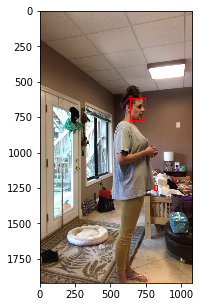

BlazeFace
Found 0 faces


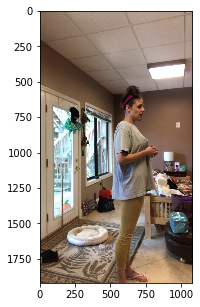

Dual Shot Face Detection
Found 1 faces


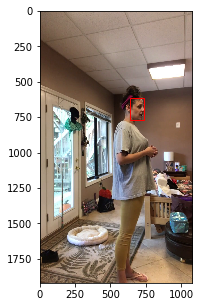

Light DSFD
Backbone: 0.0063 , FPN: 0.0008, CPM: 0.0053, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0453
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


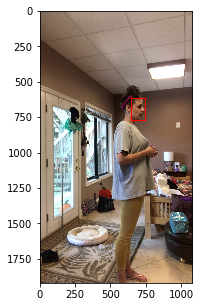

RetinaFace
Found 1 faces


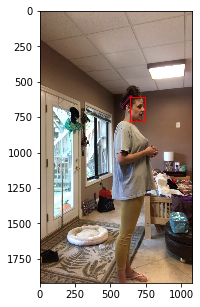

In [13]:
test_detections_on_frame(side_profile_fake_frame)

MTCNN
Found 1 faces


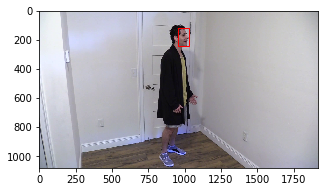

BlazeFace
Found 0 faces


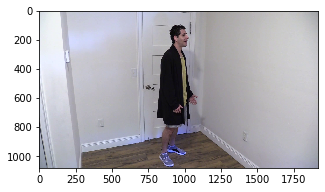

Dual Shot Face Detection
Found 1 faces


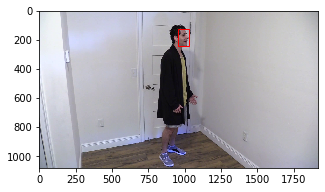

Light DSFD
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0043, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0388
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


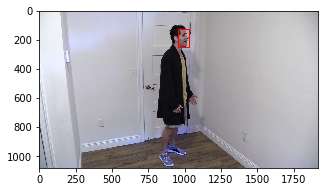

RetinaFace
Found 1 faces


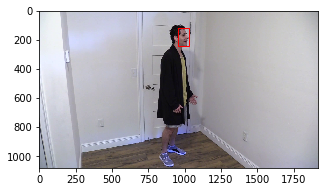

In [14]:
test_detections_on_frame(side_profile_real_frame)

For both images, all detectors worked except for BlazeFace.

It's possible that squishing the video to `128x128` is causing some problems.

It's also possible that BlazeFace isn't that great. 

## Two People

Some videos contain two people, can our detectors correctly find both people?

MTCNN
Found 2 faces


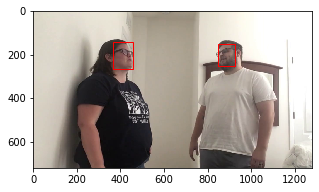

BlazeFace
Found 2 faces


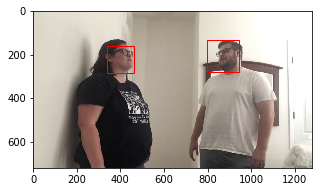

Dual Shot Face Detection
Found 2 faces


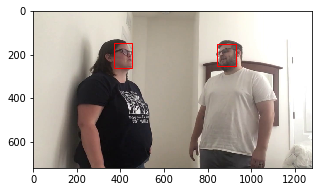

Light DSFD
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0055, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0250
Found 2 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


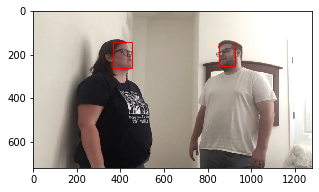

RetinaFace
Found 2 faces


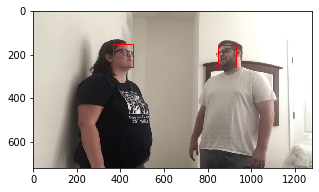

In [15]:
test_detections_on_frame(two_people_fake_frame)

MTCNN
Found 2 faces


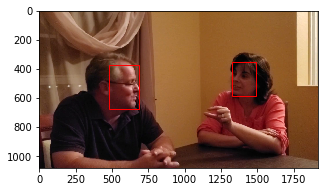

BlazeFace
Found 2 faces


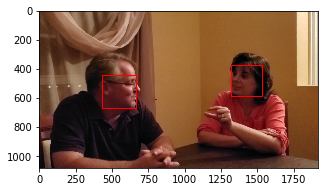

Dual Shot Face Detection
Found 2 faces


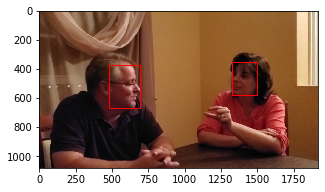

Light DSFD
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0053, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0513
Found 2 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


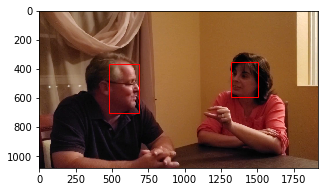

RetinaFace
Found 2 faces


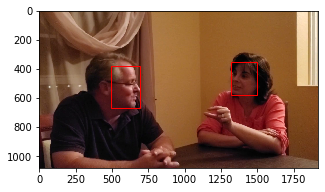

In [16]:
test_detections_on_frame(two_people_real_frame)

All detectors seemed to find both people.

## Very Dark Scenes

Some videos contain very dark scenes. Can we find the people in these scenes?

MTCNN
Found 1 faces


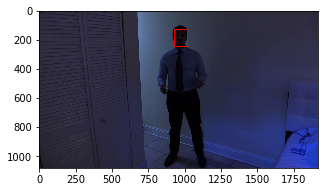

BlazeFace
Found 0 faces


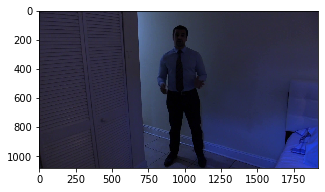

Dual Shot Face Detection
Found 1 faces


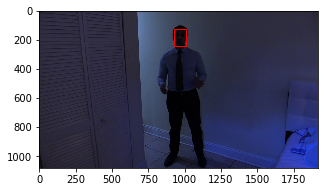

Light DSFD
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0400
Found 2 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


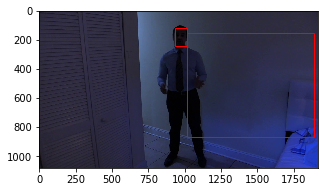

RetinaFace
Found 1 faces


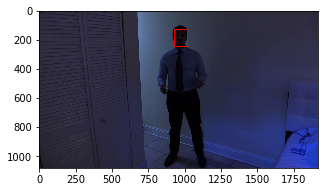

In [17]:
test_detections_on_frame(dark_scene_fake_frame)

MTCNN
Found 1 faces


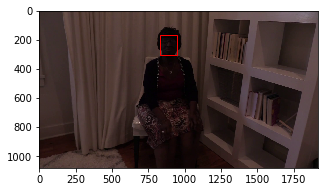

BlazeFace
Found 0 faces


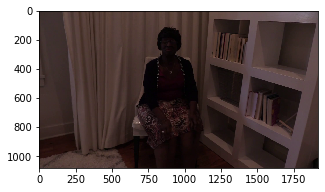

Dual Shot Face Detection
Found 1 faces


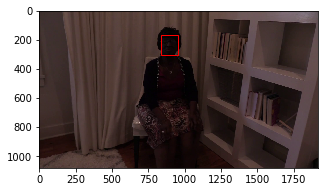

Light DSFD
Backbone: 0.0058 , FPN: 0.0011, CPM: 0.0082, Head: 0.0056, PA: 0.0003, Decode_NMS: 0.0490
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


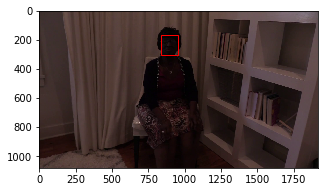

RetinaFace
Found 1 faces


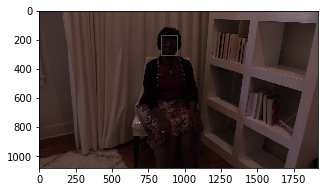

In [18]:
test_detections_on_frame(dark_scene_real_frame)

Both BlazeFace and LightDSFD have some problems.

## Moving People

Some videos contain movement, can we track the people in these vidoes? (**NOTE** This experiment doesn't demonstrate this, but I'm putting it here so you can see the video)

MTCNN
Found 1 faces


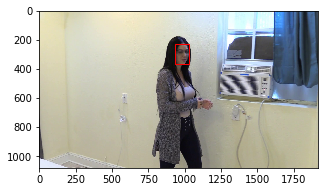

BlazeFace
Found 0 faces


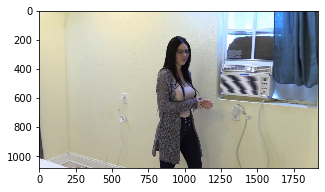

Dual Shot Face Detection
Found 1 faces


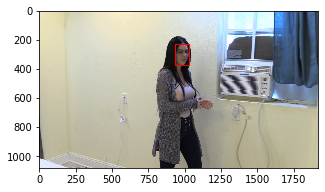

Light DSFD
Backbone: 0.0054 , FPN: 0.0010, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0513
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


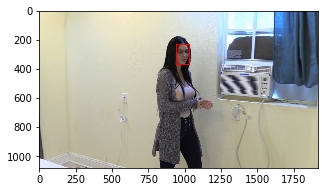

RetinaFace
Found 1 faces


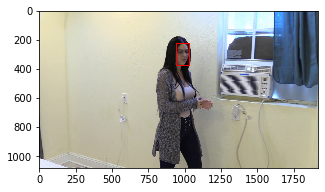

In [19]:
test_detections_on_frame(moving_fake_frame)

MTCNN
Found 1 faces


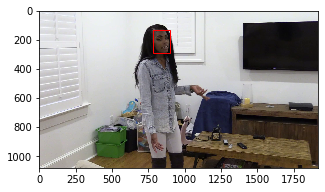

BlazeFace
Found 0 faces


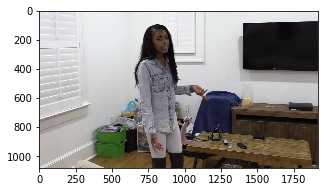

Dual Shot Face Detection
Found 1 faces


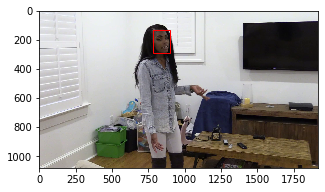

Light DSFD
Backbone: 0.0062 , FPN: 0.0010, CPM: 0.0060, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0423
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


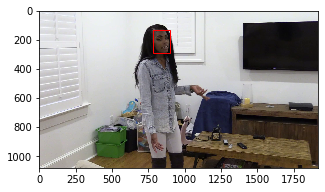

RetinaFace
Found 1 faces


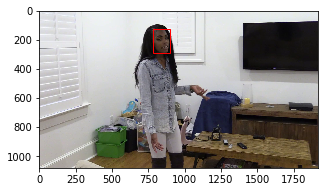

In [20]:
test_detections_on_frame(moving_real_frame)

Once again BlazeFace has problems.

## Obscured Faces

Some of the Deep Fakes corrupt the faces of the individuals we're trying to find. Does this cause problems for our dectors?

MTCNN
Found 1 faces


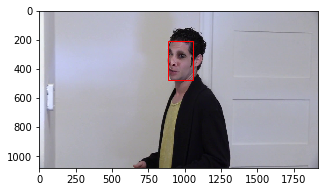

BlazeFace
Found 1 faces


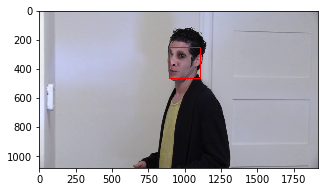

Dual Shot Face Detection
Found 1 faces


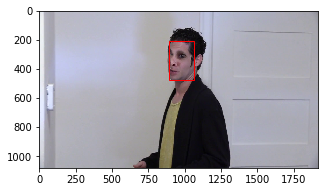

Light DSFD
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0053, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0500
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


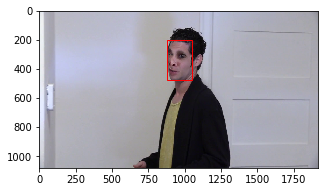

RetinaFace
Found 1 faces


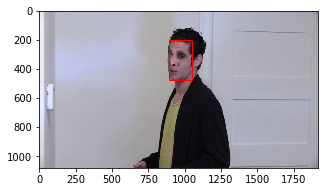

In [21]:
test_detections_on_frame(obscured_face_fake1_frame)

MTCNN
Found 0 faces


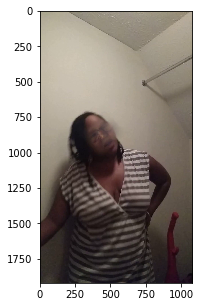

BlazeFace
Found 1 faces


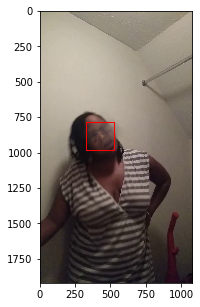

Dual Shot Face Detection
Found 1 faces


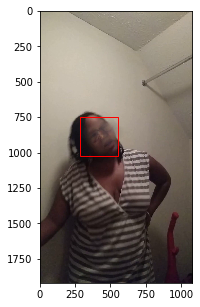

Light DSFD
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0046, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0379
Found 2 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


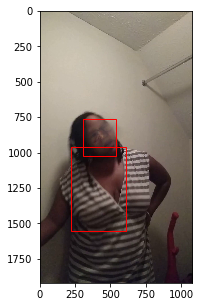

RetinaFace
Found 1 faces


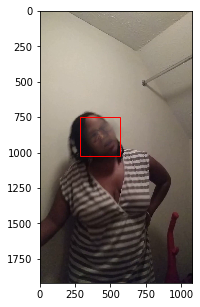

In [22]:
test_detections_on_frame(obscured_face_fake2_frame)

MTCNN
Found 1 faces


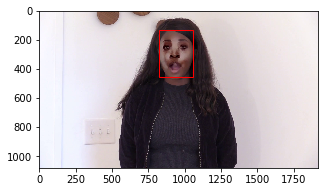

BlazeFace
Found 1 faces


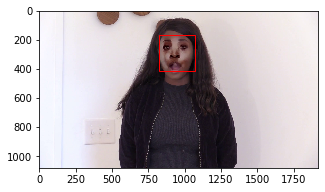

Dual Shot Face Detection
Found 1 faces


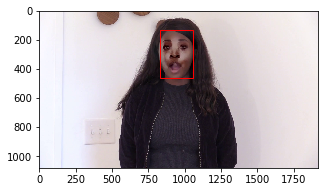

Light DSFD
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0416
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


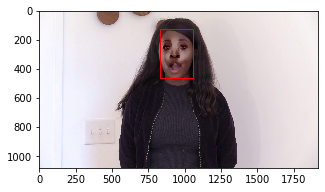

RetinaFace
Found 1 faces


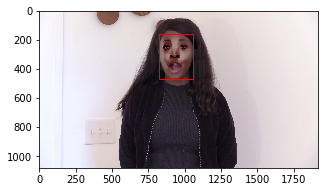

In [23]:
test_detections_on_frame(obscured_face_fake3_frame)

MTCNN
Found 1 faces


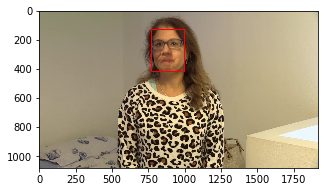

BlazeFace
Found 1 faces


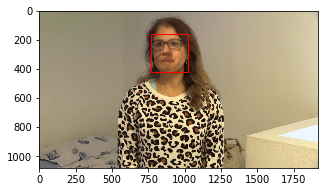

Dual Shot Face Detection
Found 1 faces


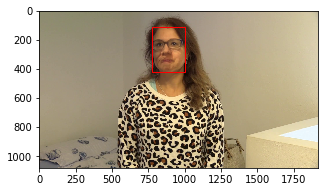

Light DSFD
Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0051, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0409
Found 1 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


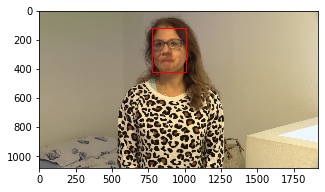

RetinaFace
Found 1 faces


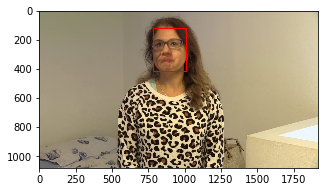

In [24]:
test_detections_on_frame(obscured_face_fake4_frame)

MTCNN
Found 1 faces


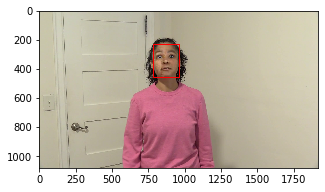

BlazeFace
Found 1 faces


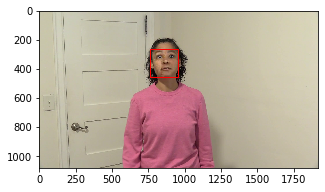

Dual Shot Face Detection
Found 1 faces


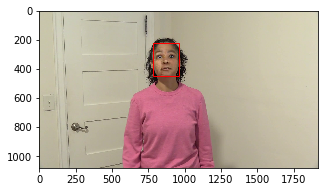

Light DSFD
Backbone: 0.0062 , FPN: 0.0010, CPM: 0.0055, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0399
Found 2 faces


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


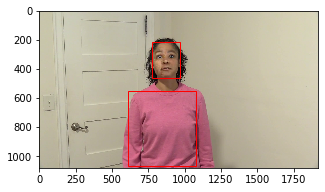

RetinaFace
Found 1 faces


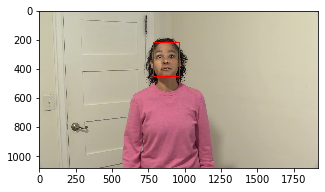

In [25]:
test_detections_on_frame(obscured_face_fake5_frame)

MTCNN, LightDSFD and BlazeFace all had problems.

RetinaFace and DSFD seemed to find all of the faces.

## Run Against Entire Video

So now we would like to run our detectors against entire videos and measure their performance. If a person is present in the video, I believe they are present for every frame. So we can measure the number of frames in which we detect a person and get a rough percentage out.

In [36]:
def measure_frames_with_detected_person(detector, frames, number_of_people_in_video=1):
    
    # The number of frames in which we detect the correct number of people
    number_correct = 0
    # The number of frames in which we miss one or more people
    number_missing = 0
    # The number of frames in which we detect an additional person
    number_extra = 0
    
    for frame in tqdm(frames):
        detections = detector.detect(frame)
        
        if len(detections) < number_of_people_in_video:
            number_missing = number_missing + 1
        elif len(detections) == number_of_people_in_video:
            number_correct = number_correct + 1
        else:
            number_extra = number_extra + 1
    
    return number_correct, number_missing, number_extra

In [39]:
named_videos = {

'side_profile_fake' : data/'dfdc_train_part_0/bqamrsyvnf_FAKE.mp4',
'side_profile_real' : data/'dfdc_train_part_11/lqyckwtvnl_REAL.mp4',
'two_people_fake' : data/'dfdc_train_part_13/aanzliuzft_FAKE.mp4',
'two_people_real' : data/'dfdc_train_part_4/bgpoldvzrh_REAL.mp4',
'dark_scene_fake' : data/'dfdc_train_part_14/bddpvihkew_FAKE.mp4',
'dark_scene_real' : data/'dfdc_train_part_5/xyklkuuumr_REAL.mp4',
'moving_fake' : data/'dfdc_train_part_7/aqgbewikxk_FAKE.mp4',
'moving_real' : data/'dfdc_train_part_8/nwzrdkxhql_REAL.mp4',
'obscured_face_fake1' : data/'dfdc_train_part_11/czmmoyfilz_FAKE.mp4',
'obscured_face_fake2' : data/'dfdc_train_part_18/asifdtncje_FAKE.mp4',
'obscured_face_fake3' : data/'dfdc_train_part_12/asjzklsxgb_FAKE.mp4',
'obscured_face_fake4' : data/'dfdc_train_part_13/aisumjkudv_FAKE.mp4',
'obscured_face_fake5' : data/'dfdc_train_part_7/copybkdfji_FAKE.mp4',
}

In [46]:
"test" in "tes"

False

In [47]:
def benchmark_detector(detector):
    tot_correct = 0
    tot_missing = 0
    tot_extra = 0
    tot_frames = 0
    
    for name, path in named_videos.items():

        all_frames = read_all_frames(path)
        
        #Some vidoes have two people in them, make sure we expect to see both
        expected_num_people = 1
        if "two" in name:
            expected_num_people = 2
            
        n_correct, n_missing, n_extra = measure_frames_with_detected_person(detector, all_frames, expected_num_people)
        
        tot_correct = tot_correct + n_correct
        tot_missing = tot_missing + n_missing
        tot_extra = tot_extra + n_extra
        tot_frames = tot_frames + len(all_frames)

        print()
        print(name)
        print("% Correct", n_correct / len(all_frames))
        print("% Missing", n_missing / len(all_frames))
        print("% Extra", n_extra / len(all_frames))
        
    print("TOTAL")
    print("% Correct", tot_correct / tot_frames)
    print("% Missing", tot_missing / tot_frames)
    print("% Extra", tot_extra / tot_frames)
    
    print('--------------------------------------------------------------------')
    print()

In [48]:
benchmark_detector(easyMTCNN)



side_profile_fake
% Correct 0.48
% Missing 0.0
% Extra 0.52




side_profile_real
% Correct 0.96
% Missing 0.0
% Extra 0.04




two_people_fake
% Correct 0.94
% Missing 0.0
% Extra 0.06




two_people_real
% Correct 0.9966555183946488
% Missing 0.0
% Extra 0.0033444816053511705




dark_scene_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0




dark_scene_real
% Correct 0.8466666666666667
% Missing 0.13666666666666666
% Extra 0.016666666666666666




moving_fake
% Correct 0.6533333333333333
% Missing 0.22333333333333333
% Extra 0.12333333333333334




moving_real
% Correct 0.9166666666666666
% Missing 0.0
% Extra 0.08333333333333333




obscured_face_fake1
% Correct 0.9766666666666667
% Missing 0.0
% Extra 0.023333333333333334




obscured_face_fake2
% Correct 0.8879668049792531
% Missing 0.029045643153526972
% Extra 0.08298755186721991




obscured_face_fake3
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake4
% Correct 0.72
% Missing 0.0
% Extra 0.28




obscured_face_fake5
% Correct 1.0
% Missing 0.0
% Extra 0.0
TOTAL
% Correct 0.875
% Missing 0.029947916666666668
% Extra 0.09505208333333333
--------------------------------------------------------------------



In [49]:
benchmark_detector(easyBlazeFace)



side_profile_fake
% Correct 0.0
% Missing 1.0
% Extra 0.0




side_profile_real
% Correct 0.17
% Missing 0.83
% Extra 0.0




two_people_fake
% Correct 0.9533333333333334
% Missing 0.04666666666666667
% Extra 0.0




two_people_real
% Correct 0.8394648829431438
% Missing 0.1605351170568562
% Extra 0.0




dark_scene_fake
% Correct 0.0
% Missing 1.0
% Extra 0.0




dark_scene_real
% Correct 0.09666666666666666
% Missing 0.9033333333333333
% Extra 0.0




moving_fake
% Correct 0.34
% Missing 0.6533333333333333
% Extra 0.006666666666666667




moving_real
% Correct 0.6066666666666667
% Missing 0.3933333333333333
% Extra 0.0




obscured_face_fake1
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake2
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake3
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake4
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake5
% Correct 1.0
% Missing 0.0
% Extra 0.0
TOTAL
% Correct 0.6098958333333333
% Missing 0.38958333333333334
% Extra 0.0005208333333333333
--------------------------------------------------------------------



In [50]:
benchmark_detector(easyDSFD)



side_profile_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0




side_profile_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




two_people_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0




two_people_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




dark_scene_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0




dark_scene_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




moving_fake
% Correct 0.86
% Missing 0.13666666666666666
% Extra 0.0033333333333333335




moving_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake1
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake2
% Correct 0.979253112033195
% Missing 0.02074688796680498
% Extra 0.0




obscured_face_fake3
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake4
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake5
% Correct 1.0
% Missing 0.0
% Extra 0.0
TOTAL
% Correct 0.9877604166666667
% Missing 0.011979166666666667
% Extra 0.00026041666666666666
--------------------------------------------------------------------



In [51]:
benchmark_detector(easyLightDSFD)

/home/josh/anaconda3/envs/dl/lib/python3.7/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/josh/anaconda3/envs/dl/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)

Backbone: 0.0075 , FPN: 0.0011, CPM: 0.0085, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0480
Backbone: 0.0065 , FPN: 0.0011, CPM: 0.0085, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0413
Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0466


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0066, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0492
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0542
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0062, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0538


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0054, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0545
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0054, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0496
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0504


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0505
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0054, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0500
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0062, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0527


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0497
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0058, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0513
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0058, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0518


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0074 , FPN: 0.0008, CPM: 0.0052, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0406
Backbone: 0.0061 , FPN: 0.0010, CPM: 0.0067, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0595


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0075, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0685
Backbone: 0.0074 , FPN: 0.0007, CPM: 0.0081, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0716


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0046, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0460
Backbone: 0.0070 , FPN: 0.0010, CPM: 0.0072, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0433
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0046, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0441


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0064, Head: 0.0049, PA: 0.0001, Decode_NMS: 0.0390
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0047, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0466
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0499


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0512
Backbone: 0.0064 , FPN: 0.0008, CPM: 0.0060, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0517
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0054, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0504


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0010, CPM: 0.0054, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0461
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0069, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0406
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0064, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0414


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0083, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0472
Backbone: 0.0043 , FPN: 0.0008, CPM: 0.0081, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0426
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0493


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0064, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0501
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0502
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0541


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0006, CPM: 0.0047, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0401
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0049, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0436
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0050, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0452


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0069, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0464
Backbone: 0.0068 , FPN: 0.0008, CPM: 0.0046, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0467
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0058, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0436


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0010, CPM: 0.0061, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0468
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0456
Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0051, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0010, CPM: 0.0071, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0404
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0054, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0399
Backbone: 0.0041 , FPN: 0.0007, CPM: 0.0091, Head: 0.0065, PA: 0.0003, Decode_NMS: 0.0449


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0049, Head: 0.0054, PA: 0.0003, Decode_NMS: 0.0434
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0063, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0399
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0070, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0424


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0010, CPM: 0.0050, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0401
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0495
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0498


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0490
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0059, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0405
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0069, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0507


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0045, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0045, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0402
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0046, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0440


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0504
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0498
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0493


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0506
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0503
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0495


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0055, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0497
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0058, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0508
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0524


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0065, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0517
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0068, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0455


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0075 , FPN: 0.0010, CPM: 0.0068, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0552
Backbone: 0.0068 , FPN: 0.0009, CPM: 0.0071, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0630


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0072, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0624
Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0056, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0053 , FPN: 0.0010, CPM: 0.0070, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0614


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0008, CPM: 0.0060, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0560
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0530
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0053, Head: 0.0049, PA: 0.0003, Decode_NMS: 0.0454


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0011, CPM: 0.0063, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0469
Backbone: 0.0053 , FPN: 0.0010, CPM: 0.0054, Head: 0.0055, PA: 0.0003, Decode_NMS: 0.0438
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0054, Head: 0.0051, PA: 0.0004, Decode_NMS: 0.0478


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0008, CPM: 0.0056, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0443
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0051, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0428
Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0049, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0477


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0066, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0501
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0056, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0530


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0055, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0501
Backbone: 0.0049 , FPN: 0.0008, CPM: 0.0057, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0510


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0052, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0413
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0078, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0412
Backbone: 0.0054 , FPN: 0.0010, CPM: 0.0076, Head: 0.0055, PA: 0.0003, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0059, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0540
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0058, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0538
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0046, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0410


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0067, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0407
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0060, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0536
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0056, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0394


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0062, Head: 0.0051, PA: 0.0003, Decode_NMS: 0.0415
Backbone: 0.0043 , FPN: 0.0010, CPM: 0.0059, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0487
Backbone: 0.0045 , FPN: 0.0010, CPM: 0.0053, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0442


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0010, CPM: 0.0066, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0439
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0513
Backbone: 0.0069 , FPN: 0.0011, CPM: 0.0057, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0468


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0012, CPM: 0.0089, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0429
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0053, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0429
Backbone: 0.0073 , FPN: 0.0008, CPM: 0.0054, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0418


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0053, Head: 0.0062, PA: 0.0003, Decode_NMS: 0.0421
Backbone: 0.0047 , FPN: 0.0008, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0432
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0050, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0425


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0009, CPM: 0.0061, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0453
Backbone: 0.0053 , FPN: 0.0010, CPM: 0.0059, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0457
Backbone: 0.0046 , FPN: 0.0009, CPM: 0.0051, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0465


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0048, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0453
Backbone: 0.0063 , FPN: 0.0006, CPM: 0.0047, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0457
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0051, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0059, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0486
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0054, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0402
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0058, Head: 0.0061, PA: 0.0003, Decode_NMS: 0.0403


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0060, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0505
Backbone: 0.0066 , FPN: 0.0007, CPM: 0.0048, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0415
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0047, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0444


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0049, Head: 0.0045, PA: 0.0004, Decode_NMS: 0.0492
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0056, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0401
Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0052, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0477


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0078 , FPN: 0.0007, CPM: 0.0065, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0484
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0066, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0456
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0054, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0502


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0051, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0456
Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0045, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0429
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0046, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0457


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0007, CPM: 0.0062, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0459
Backbone: 0.0050 , FPN: 0.0011, CPM: 0.0081, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0427
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0512


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0011, CPM: 0.0064, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0412
Backbone: 0.0042 , FPN: 0.0009, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0520
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0528


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0527
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0054, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0459
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0063, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0460


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0010, CPM: 0.0048, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0437
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0471
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0049, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0410


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0062, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0430
Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0490
Backbone: 0.0079 , FPN: 0.0007, CPM: 0.0050, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0411


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0503
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0054, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0503
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0507


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0055, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0434
Backbone: 0.0048 , FPN: 0.0009, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0438
Backbone: 0.0049 , FPN: 0.0010, CPM: 0.0050, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0446


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0062, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0502
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0475
Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0052, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0454


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0077 , FPN: 0.0010, CPM: 0.0061, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0459
Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0451
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0050, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0465


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0051, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0468
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0049, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0480
Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0553


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0064 , FPN: 0.0010, CPM: 0.0080, Head: 0.0056, PA: 0.0003, Decode_NMS: 0.0685
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0058, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0542


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0524
Backbone: 0.0062 , FPN: 0.0006, CPM: 0.0049, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0422
Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0078, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0664


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0069 , FPN: 0.0012, CPM: 0.0080, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0668
Backbone: 0.0060 , FPN: 0.0010, CPM: 0.0081, Head: 0.0055, PA: 0.0003, Decode_NMS: 0.0592


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0011, CPM: 0.0084, Head: 0.0049, PA: 0.0003, Decode_NMS: 0.0459
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0508
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0055, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0570


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0583
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0062, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0537


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0068, Head: 0.0054, PA: 0.0003, Decode_NMS: 0.0585
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0066, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0677


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0081, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0604
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0057, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0434
Backbone: 0.0049 , FPN: 0.0009, CPM: 0.0051, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0393


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0071 , FPN: 0.0006, CPM: 0.0048, Head: 0.0039, PA: 0.0003, Decode_NMS: 0.0420
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0053, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0380
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0055, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0398


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0010, CPM: 0.0057, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0461
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0046, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0396
Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0580


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0010, CPM: 0.0076, Head: 0.0057, PA: 0.0003, Decode_NMS: 0.0665
Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0049, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0405
Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0085, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0418


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0054 , FPN: 0.0009, CPM: 0.0060, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0443
Backbone: 0.0068 , FPN: 0.0015, CPM: 0.0077, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0623


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0010, CPM: 0.0078, Head: 0.0056, PA: 0.0003, Decode_NMS: 0.0665
Backbone: 0.0064 , FPN: 0.0006, CPM: 0.0048, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0405
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0047, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0451


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0057, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0539
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0566


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0060, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0657
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0067, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0502
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0061, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0481


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0496
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0444
Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0437


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0045, Head: 0.0051, PA: 0.0003, Decode_NMS: 0.0457
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0055, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0472


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0110 , FPN: 0.0021, CPM: 0.0119, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0522
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0054, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0523
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0541


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0054, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0545
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0054, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0549
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0500


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0500
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0058, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0506
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0504


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0514
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0054, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0488
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0505


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0509
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0054, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0464
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0052, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0404


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0013, CPM: 0.0081, Head: 0.0049, PA: 0.0003, Decode_NMS: 0.0404
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0459
Backbone: 0.0068 , FPN: 0.0007, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0073 , FPN: 0.0006, CPM: 0.0049, Head: 0.0046, PA: 0.0003, Decode_NMS: 0.0428
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0047, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0390
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0048, Head: 0.0061, PA: 0.0003, Decode_NMS: 0.0406


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0012, CPM: 0.0073, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0450
Backbone: 0.0051 , FPN: 0.0009, CPM: 0.0057, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0434
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0048, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0452


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0065, Head: 0.0042, PA: 0.0003, Decode_NMS: 0.0519
Backbone: 0.0061 , FPN: 0.0006, CPM: 0.0049, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0400
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0046, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0464


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0465
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0436
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0474


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0424
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0401
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0486


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0436
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0493
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0064, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0502


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0061, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0498
Backbone: 0.0057 , FPN: 0.0009, CPM: 0.0057, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0424
Backbone: 0.0046 , FPN: 0.0010, CPM: 0.0053, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0007, CPM: 0.0053, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0406
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0048, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0430
Backbone: 0.0045 , FPN: 0.0009, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0469


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0454
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0472
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0052, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0399


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0047, Head: 0.0061, PA: 0.0003, Decode_NMS: 0.0409
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0063, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0481
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0050, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0433


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0456
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0537
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0502


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0505
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0503
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0501


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0530
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0054, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0527
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0054, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0499


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0472
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0046, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0427
Backbone: 0.0054 , FPN: 0.0011, CPM: 0.0078, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0423


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0503
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0054, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0389
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0500


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0060, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0502
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0401
Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0061, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0455


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0009, CPM: 0.0055, Head: 0.0072, PA: 0.0002, Decode_NMS: 0.0415
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0045, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0385
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0432


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0048, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0424
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0052, Head: 0.0061, PA: 0.0002, Decode_NMS: 0.0404
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0049, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0393


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0064, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0419
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0047, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0428
Backbone: 0.0047 , FPN: 0.0009, CPM: 0.0073, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0635


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0062, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0567
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0078, Head: 0.0081, PA: 0.0002, Decode_NMS: 0.0574
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0060, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0405


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0071 , FPN: 0.0009, CPM: 0.0063, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0589
Backbone: 0.0085 , FPN: 0.0010, CPM: 0.0070, Head: 0.0057, PA: 0.0003, Decode_NMS: 0.0695


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0046, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0422
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0048, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0050 , FPN: 0.0010, CPM: 0.0068, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0555


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0069 , FPN: 0.0008, CPM: 0.0079, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0574
Backbone: 0.0062 , FPN: 0.0012, CPM: 0.0093, Head: 0.0065, PA: 0.0002, Decode_NMS: 0.0675


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0006, CPM: 0.0046, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0416
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0047, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0454
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0049, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0470


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0058, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0409
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0462
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0048, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0387


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0457
Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0046, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0415
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0045, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0404


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0051, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0543


side_profile_fake
% Correct 0.9733333333333334
% Missing 0.0
% Extra 0.02666666666666667


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0006, CPM: 0.0047, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0417
Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0073, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0419
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0055, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0500


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0513
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0452
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0402


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0010, CPM: 0.0068, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0507
Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0048, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0395
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0047, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0423


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0068 , FPN: 0.0007, CPM: 0.0050, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0546
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0489
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0517


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0057, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0517
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0054, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0444
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0047, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0548


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0072 , FPN: 0.0010, CPM: 0.0079, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0744
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0054, Head: 0.0056, PA: 0.0003, Decode_NMS: 0.0706


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0075 , FPN: 0.0010, CPM: 0.0081, Head: 0.0062, PA: 0.0002, Decode_NMS: 0.0660
Backbone: 0.0076 , FPN: 0.0007, CPM: 0.0062, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0608


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0062, Head: 0.0049, PA: 0.0003, Decode_NMS: 0.0523
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0049, Head: 0.0051, PA: 0.0003, Decode_NMS: 0.0439
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0047, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0519


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0069 , FPN: 0.0011, CPM: 0.0080, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0696
Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0077, Head: 0.0059, PA: 0.0003, Decode_NMS: 0.0639


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0448
Backbone: 0.0066 , FPN: 0.0007, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0413
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0047, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0427


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0058, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0413
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0045, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0444
Backbone: 0.0073 , FPN: 0.0009, CPM: 0.0057, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0513


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0006, CPM: 0.0066, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0435
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0056, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0451
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0045, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0604


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0009, CPM: 0.0079, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0578
Backbone: 0.0072 , FPN: 0.0011, CPM: 0.0076, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0461
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0063, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0432


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0051, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0465
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0064, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0396
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0050, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0420


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0008, CPM: 0.0079, Head: 0.0052, PA: 0.0003, Decode_NMS: 0.0696
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0077, Head: 0.0054, PA: 0.0003, Decode_NMS: 0.0523
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0052, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0504
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0513
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0528


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0527
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0412
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0048, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0446


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0010, CPM: 0.0065, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0464
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0050, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0434
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0478


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0006, CPM: 0.0061, Head: 0.0049, PA: 0.0003, Decode_NMS: 0.0426
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0054, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0407
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0051, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0415


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0050 , FPN: 0.0009, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0439
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0063, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0568


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0051 , FPN: 0.0010, CPM: 0.0086, Head: 0.0052, PA: 0.0003, Decode_NMS: 0.0730
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0064, Head: 0.0048, PA: 0.0003, Decode_NMS: 0.0646


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0073 , FPN: 0.0011, CPM: 0.0078, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0486
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0051, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0403
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0407


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0009, CPM: 0.0081, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0509
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0508
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0523


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0513
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0513
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0513


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0503
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0502
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0064, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0397


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0065, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0408
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0428
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0058, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0444


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0012, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0523
Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0057, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0394


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0062, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0431
Backbone: 0.0049 , FPN: 0.0009, CPM: 0.0056, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0464
Backbone: 0.0076 , FPN: 0.0013, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0008, CPM: 0.0046, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0449
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0061, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0395
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0049, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0415


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0063, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0513
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0508


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0052, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0437
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0054, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0399
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0050, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0425


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0510
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0063, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0433
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0501


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0063, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0507
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0513
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0047, Head: 0.0039, PA: 0.0003, Decode_NMS: 0.0413


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0397
Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0430
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0070, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0408


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0058, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0542
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0533
Backbone: 0.0066 , FPN: 0.0006, CPM: 0.0046, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0424


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0010, CPM: 0.0051, Head: 0.0042, PA: 0.0003, Decode_NMS: 0.0431
Backbone: 0.0061 , FPN: 0.0006, CPM: 0.0054, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0416
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0046, Head: 0.0041, PA: 0.0003, Decode_NMS: 0.0450


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0064, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0436
Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0062, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0418
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0478


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0009, CPM: 0.0050, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0449
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0450
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0045, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0047, Head: 0.0044, PA: 0.0003, Decode_NMS: 0.0423
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0065, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0390
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0505


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0512
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0503
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0500


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0525
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0528
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0514


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0501
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0441
Backbone: 0.0046 , FPN: 0.0011, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0450


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0010, CPM: 0.0060, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0463
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0048, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0418
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0050, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0405


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0051, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0425
Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0454
Backbone: 0.0070 , FPN: 0.0010, CPM: 0.0048, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0414


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0069 , FPN: 0.0008, CPM: 0.0048, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0498
Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0069, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0569


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0055 , FPN: 0.0011, CPM: 0.0078, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0679
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0071, Head: 0.0057, PA: 0.0003, Decode_NMS: 0.0652


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0006, CPM: 0.0074, Head: 0.0061, PA: 0.0003, Decode_NMS: 0.0520
Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0060, Head: 0.0074, PA: 0.0003, Decode_NMS: 0.0433
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0462


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0064, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0604
Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0085, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0631


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0073 , FPN: 0.0010, CPM: 0.0073, Head: 0.0062, PA: 0.0003, Decode_NMS: 0.0564
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0062, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0498


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0512
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0510
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0501


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0009, CPM: 0.0058, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0404
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0053, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0456
Backbone: 0.0041 , FPN: 0.0007, CPM: 0.0059, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0392


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0009, CPM: 0.0061, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0510
Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0083, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0432
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0452


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0011, CPM: 0.0070, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0405
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0046, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0416
Backbone: 0.0047 , FPN: 0.0008, CPM: 0.0048, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0422


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0050, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0531
Backbone: 0.0044 , FPN: 0.0010, CPM: 0.0058, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0439
Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0053, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0425


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0010, CPM: 0.0070, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0443
Backbone: 0.0063 , FPN: 0.0010, CPM: 0.0047, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0390
Backbone: 0.0066 , FPN: 0.0009, CPM: 0.0071, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0699


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0046, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0453
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0054, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0412
Backbone: 0.0045 , FPN: 0.0011, CPM: 0.0062, Head: 0.0058, PA: 0.0001, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0067, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0502
Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0047, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0447


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0073 , FPN: 0.0009, CPM: 0.0076, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0422
Backbone: 0.0043 , FPN: 0.0008, CPM: 0.0051, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0416
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0058, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0447


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0010, CPM: 0.0075, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0447
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0046, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0453
Backbone: 0.0070 , FPN: 0.0006, CPM: 0.0045, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0389


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0072 , FPN: 0.0011, CPM: 0.0076, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0444
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0440
Backbone: 0.0075 , FPN: 0.0011, CPM: 0.0057, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0438


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0052, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0456
Backbone: 0.0072 , FPN: 0.0006, CPM: 0.0048, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0413
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0046, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0478


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0063, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0048, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0431
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0512


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0449
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0508


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0080 , FPN: 0.0007, CPM: 0.0070, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0621
Backbone: 0.0080 , FPN: 0.0011, CPM: 0.0071, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0408
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0049, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0473


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0060, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0555
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0496
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0064, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0422


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0056, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0448
Backbone: 0.0063 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0446
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0047, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0458


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0063, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0511
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0066, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0546
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0057, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0513


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0005, Decode_NMS: 0.0526
Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0049, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0422
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0084, Head: 0.0060, PA: 0.0003, Decode_NMS: 0.0482


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0010, CPM: 0.0062, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0485
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0049, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0459
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0053, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0445


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0008, CPM: 0.0090, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0450
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0055, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0465
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0050, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0464


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0073 , FPN: 0.0007, CPM: 0.0074, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0404
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0067, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0442
Backbone: 0.0049 , FPN: 0.0009, CPM: 0.0050, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0462


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0051, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0430
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0073, Head: 0.0054, PA: 0.0003, Decode_NMS: 0.0435
Backbone: 0.0046 , FPN: 0.0009, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0464


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0007, CPM: 0.0056, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0050, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0069, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0528


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0519
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0500
Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0050, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0456


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0050, Head: 0.0047, PA: 0.0003, Decode_NMS: 0.0413
Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0048, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0065 , FPN: 0.0011, CPM: 0.0072, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0498


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0009, CPM: 0.0063, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0535
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0480
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0450


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0067, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0432
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0076, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0433
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0047, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0431


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0010, CPM: 0.0061, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0452
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0479
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0047, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0399


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0052, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0472
Backbone: 0.0048 , FPN: 0.0010, CPM: 0.0052, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0455
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0413


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0520
Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0057, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0522
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0066, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0532


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0551
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0529
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0055, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0517


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0567
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0529


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0056, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0550
Backbone: 0.0070 , FPN: 0.0009, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0435
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0049, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0607


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0009, CPM: 0.0072, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0431
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0050, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0432
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0046, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0391


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0009, CPM: 0.0054, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0462
Backbone: 0.0047 , FPN: 0.0011, CPM: 0.0055, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0441
Backbone: 0.0048 , FPN: 0.0009, CPM: 0.0059, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0461


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0010, CPM: 0.0060, Head: 0.0046, PA: 0.0003, Decode_NMS: 0.0452
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0053, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0421
Backbone: 0.0061 , FPN: 0.0010, CPM: 0.0063, Head: 0.0051, PA: 0.0004, Decode_NMS: 0.0468


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0007, CPM: 0.0055, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0465
Backbone: 0.0045 , FPN: 0.0009, CPM: 0.0071, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0513
Backbone: 0.0050 , FPN: 0.0011, CPM: 0.0089, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0493


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0012, CPM: 0.0086, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0500
Backbone: 0.0074 , FPN: 0.0010, CPM: 0.0071, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0543
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0060, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0467


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0009, CPM: 0.0063, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0432
Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0050, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0047 , FPN: 0.0009, CPM: 0.0048, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0065, Head: 0.0045, PA: 0.0003, Decode_NMS: 0.0459
Backbone: 0.0049 , FPN: 0.0009, CPM: 0.0051, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0508
Backbone: 0.0070 , FPN: 0.0010, CPM: 0.0055, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0476


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0012, CPM: 0.0090, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0600
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0048, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0570
Backbone: 0.0054 , FPN: 0.0010, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0453


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0008, CPM: 0.0060, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0441
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0050, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0418
Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0070, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0498


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0082, Head: 0.0059, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0069 , FPN: 0.0007, CPM: 0.0068, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0474
Backbone: 0.0072 , FPN: 0.0008, CPM: 0.0051, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0465


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0052, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0455
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0535
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0054, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0547


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0458
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0054, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0461
Backbone: 0.0078 , FPN: 0.0014, CPM: 0.0084, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0442


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0059, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0513
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0048, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0449
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0064, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0479


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0068 , FPN: 0.0010, CPM: 0.0074, Head: 0.0053, PA: 0.0001, Decode_NMS: 0.0653
Backbone: 0.0070 , FPN: 0.0011, CPM: 0.0090, Head: 0.0063, PA: 0.0003, Decode_NMS: 0.0482
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0065, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0435


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0009, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0440
Backbone: 0.0073 , FPN: 0.0010, CPM: 0.0050, Head: 0.0039, PA: 0.0003, Decode_NMS: 0.0416
Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0047, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0445


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0050, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0418
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0052, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0408
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0462


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0079 , FPN: 0.0011, CPM: 0.0068, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0438
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0421
Backbone: 0.0061 , FPN: 0.0006, CPM: 0.0046, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0074, Head: 0.0062, PA: 0.0002, Decode_NMS: 0.0704
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0058, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0408
Backbone: 0.0047 , FPN: 0.0008, CPM: 0.0060, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0070, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0440
Backbone: 0.0075 , FPN: 0.0011, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0419
Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0438


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0074 , FPN: 0.0011, CPM: 0.0091, Head: 0.0063, PA: 0.0002, Decode_NMS: 0.0765
Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0079, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0702


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0072 , FPN: 0.0010, CPM: 0.0075, Head: 0.0058, PA: 0.0003, Decode_NMS: 0.0761
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0057, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0532


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0069, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0574


side_profile_real
% Correct 0.9933333333333333
% Missing 0.0
% Extra 0.006666666666666667


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0240
Backbone: 0.0051 , FPN: 0.0009, CPM: 0.0066, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0276
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0055, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0245
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0245


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0068, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0270
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0240
Backbone: 0.0064 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0244
Backbone: 0.0054 , FPN: 0.0009, CPM: 0.0063, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0269


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0048, Head: 0.0043, PA: 0.0003, Decode_NMS: 0.0209
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0250
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0058, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0239
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0241


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0071 , FPN: 0.0007, CPM: 0.0064, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0269
Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0066, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0202
Backbone: 0.0067 , FPN: 0.0009, CPM: 0.0050, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0227
Backbone: 0.0074 , FPN: 0.0012, CPM: 0.0051, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0228


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0049, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0229
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0240
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0065, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0266
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0246


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0245
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0065, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0210
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0071, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0211
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0069, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0232


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0009, CPM: 0.0048, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0231
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0242
Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0063, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0261
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0237


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0054, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0245
Backbone: 0.0045 , FPN: 0.0010, CPM: 0.0082, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0241
Backbone: 0.0051 , FPN: 0.0011, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0207
Backbone: 0.0045 , FPN: 0.0010, CPM: 0.0072, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0191


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0053, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0226
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0069, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0183
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0051, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0232
Backbone: 0.0065 , FPN: 0.0006, CPM: 0.0055, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0229


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0229
Backbone: 0.0067 , FPN: 0.0007, CPM: 0.0051, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0214
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0046, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0257
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0050, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0216


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0078, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0210
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0231
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0254
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0060, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0236


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0244
Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0249
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0055, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0230
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0237


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0063, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0269
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0058, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0237
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0240
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0063, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0181


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0047, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0239
Backbone: 0.0045 , FPN: 0.0011, CPM: 0.0085, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0263
Backbone: 0.0067 , FPN: 0.0007, CPM: 0.0046, Head: 0.0045, PA: 0.0003, Decode_NMS: 0.0221
Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0207


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0242
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0059, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0237
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0064, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0276
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0244


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0054, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0244
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0059, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0236
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0241
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0054, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0242


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0238
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0235
Backbone: 0.0064 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0254
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0058, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0230


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0060, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0249
Backbone: 0.0066 , FPN: 0.0010, CPM: 0.0061, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0223
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0047, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0200
Backbone: 0.0078 , FPN: 0.0013, CPM: 0.0057, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0217


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0053, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0217
Backbone: 0.0069 , FPN: 0.0011, CPM: 0.0060, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0204
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0051, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0196
Backbone: 0.0071 , FPN: 0.0007, CPM: 0.0050, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0205
Backbone: 0.0070 , FPN: 0.0008, CPM: 0.0059, Head: 0.0055, PA: 0.0001, Decode_NMS: 0.0186


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0055, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0231
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0057, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0178
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0060, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0227
Backbone: 0.0042 , FPN: 0.0009, CPM: 0.0078, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0184


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0245
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0046, Head: 0.0033, PA: 0.0002, Decode_NMS: 0.0220
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0205
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0064, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0254


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0054, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0261
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0058, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0243
Backbone: 0.0053 , FPN: 0.0010, CPM: 0.0065, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0271
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0055, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0244


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0237
Backbone: 0.0055 , FPN: 0.0011, CPM: 0.0078, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0225
Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0046, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0192
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0058, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0265


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0057, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0239
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0061, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0240
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0246
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0064, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0237


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0237
Backbone: 0.0072 , FPN: 0.0007, CPM: 0.0050, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0217
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0046, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0236
Backbone: 0.0069 , FPN: 0.0008, CPM: 0.0048, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0214


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0047, Head: 0.0045, PA: 0.0003, Decode_NMS: 0.0191
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0247
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0058, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0231
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0070, Head: 0.0055, PA: 0.0001, Decode_NMS: 0.0205


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0011, CPM: 0.0077, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0200
Backbone: 0.0056 , FPN: 0.0010, CPM: 0.0052, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0225
Backbone: 0.0065 , FPN: 0.0008, CPM: 0.0058, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0246
Backbone: 0.0049 , FPN: 0.0008, CPM: 0.0064, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0265


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0052, Head: 0.0079, PA: 0.0002, Decode_NMS: 0.0206
Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0061, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0262
Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0060, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0254
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0057, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0298


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0068, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0247
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0061, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0258
Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0241
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0059, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0287


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0057, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0271
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0061, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0251
Backbone: 0.0063 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0256
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0052, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0203


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0010, CPM: 0.0070, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0234
Backbone: 0.0059 , FPN: 0.0012, CPM: 0.0097, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0244
Backbone: 0.0047 , FPN: 0.0009, CPM: 0.0051, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0199
Backbone: 0.0069 , FPN: 0.0007, CPM: 0.0048, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0227


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0236
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0059, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0252
Backbone: 0.0080 , FPN: 0.0007, CPM: 0.0051, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0225
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0049, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0216


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0050, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0242
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0056, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0189
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0063, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0247
Backbone: 0.0047 , FPN: 0.0011, CPM: 0.0070, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0310


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0073, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0470
Backbone: 0.0076 , FPN: 0.0010, CPM: 0.0071, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0288
Backbone: 0.0061 , FPN: 0.0010, CPM: 0.0081, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0295


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0072, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0346
Backbone: 0.0072 , FPN: 0.0007, CPM: 0.0051, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0254
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0051, Head: 0.0055, PA: 0.0001, Decode_NMS: 0.0213
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0085, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0282


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0050, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0240
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0058, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0248
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0065, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0278
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0246


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0247
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0239
Backbone: 0.0049 , FPN: 0.0008, CPM: 0.0060, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0249
Backbone: 0.0066 , FPN: 0.0007, CPM: 0.0048, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0244


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0054, Head: 0.0068, PA: 0.0004, Decode_NMS: 0.0236
Backbone: 0.0062 , FPN: 0.0011, CPM: 0.0068, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0222
Backbone: 0.0075 , FPN: 0.0010, CPM: 0.0062, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0242
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0051, Head: 0.0050, PA: 0.0004, Decode_NMS: 0.0213


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0250
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0064, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0265
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0218
Backbone: 0.0071 , FPN: 0.0010, CPM: 0.0051, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0220


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0059, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0236
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0060, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0255
Backbone: 0.0056 , FPN: 0.0010, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0254
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0236


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0242
Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0065, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0261
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0061, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0235
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0063, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0256


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0009, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0264
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0060, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0232
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0251
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0260


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0060, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0241
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0243
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0061, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0258
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0245


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0249
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0246
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0061, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0272
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0260


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0057, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0228
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0080, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0256
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0054, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0245
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0251


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0064, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0276
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0240
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0239
Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0064, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0268


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0048, Head: 0.0059, PA: 0.0004, Decode_NMS: 0.0223
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0251
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0066, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0244
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0239


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0065, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0214
Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0235
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0049, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0228
Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0050, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0219


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0049, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0209
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0268
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0064, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0282
Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0249


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0068 , FPN: 0.0007, CPM: 0.0052, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0261
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0061, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0274
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0061, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0235
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0064, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0250


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0062, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0248
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0061, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0280
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0249
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0241


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0064, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0276
Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0050, Head: 0.0051, PA: 0.0003, Decode_NMS: 0.0240
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0058, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0224
Backbone: 0.0072 , FPN: 0.0011, CPM: 0.0058, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0247


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0241
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0246
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0243
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0240


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0007, CPM: 0.0049, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0214
Backbone: 0.0064 , FPN: 0.0010, CPM: 0.0055, Head: 0.0038, PA: 0.0003, Decode_NMS: 0.0223
Backbone: 0.0063 , FPN: 0.0006, CPM: 0.0048, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0232
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0048, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0229


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0073, Head: 0.0053, PA: 0.0001, Decode_NMS: 0.0214
Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0070, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0271
Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0077, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0227
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0057, Head: 0.0055, PA: 0.0001, Decode_NMS: 0.0229


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0010, CPM: 0.0068, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0186
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0223
Backbone: 0.0051 , FPN: 0.0011, CPM: 0.0070, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0184
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0198
Backbone: 0.0058 , FPN: 0.0010, CPM: 0.0076, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0186


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0062, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0251
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0056, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0244
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0066, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0274
Backbone: 0.0047 , FPN: 0.0008, CPM: 0.0057, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0223


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0068, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0229
Backbone: 0.0054 , FPN: 0.0009, CPM: 0.0049, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0245
Backbone: 0.0065 , FPN: 0.0006, CPM: 0.0048, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0221
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0253


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0061, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0233
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0060, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0229
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0069, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0259
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0267


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0057, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0255
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0232
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0244
Backbone: 0.0051 , FPN: 0.0009, CPM: 0.0063, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0283


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0061, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0241
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0060, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0243
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0261
Backbone: 0.0060 , FPN: 0.0009, CPM: 0.0066, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0245


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0273
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0058, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0241
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0066, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0192
Backbone: 0.0041 , FPN: 0.0007, CPM: 0.0066, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0224


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0009, CPM: 0.0073, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0203
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0054, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0227
Backbone: 0.0043 , FPN: 0.0009, CPM: 0.0082, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0233
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0055, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0199
Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0069, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0210


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0060, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0200
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0059, Head: 0.0054, PA: 0.0001, Decode_NMS: 0.0196
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0053, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0238
Backbone: 0.0074 , FPN: 0.0009, CPM: 0.0075, Head: 0.0060, PA: 0.0003, Decode_NMS: 0.0250


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0054, Head: 0.0104, PA: 0.0003, Decode_NMS: 0.0310
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0080, Head: 0.0059, PA: 0.0002, Decode_NMS: 0.0416
Backbone: 0.0063 , FPN: 0.0010, CPM: 0.0079, Head: 0.0051, PA: 0.0001, Decode_NMS: 0.0307


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0074 , FPN: 0.0009, CPM: 0.0068, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0236
Backbone: 0.0060 , FPN: 0.0010, CPM: 0.0068, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0253
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0056, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0236
Backbone: 0.0050 , FPN: 0.0010, CPM: 0.0066, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0283


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0076, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0260
Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0072, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0269
Backbone: 0.0065 , FPN: 0.0008, CPM: 0.0062, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0286
Backbone: 0.0067 , FPN: 0.0008, CPM: 0.0063, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0256


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0072 , FPN: 0.0007, CPM: 0.0051, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0223
Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0250
Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0048, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0225
Backbone: 0.0075 , FPN: 0.0009, CPM: 0.0059, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0383


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0077, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0337
Backbone: 0.0055 , FPN: 0.0010, CPM: 0.0072, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0357
Backbone: 0.0068 , FPN: 0.0010, CPM: 0.0065, Head: 0.0062, PA: 0.0003, Decode_NMS: 0.0302
Backbone: 0.0066 , FPN: 0.0011, CPM: 0.0055, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0210


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0007, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0206
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0049, Head: 0.0054, PA: 0.0003, Decode_NMS: 0.0216
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0061, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0253
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0260


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0057, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0248
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0245
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0067, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0246
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0063, Head: 0.0051, PA: 0.0001, Decode_NMS: 0.0189


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0061, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0208
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0248
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0254
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0245


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0065, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0284
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0054, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0248
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0056, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0248
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0062, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0272


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0056, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0246
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0241
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0064, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0200
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0061, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0209


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0054, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0189
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0061, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0202
Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0054, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0190


two_people_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0012, CPM: 0.0074, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0504
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0060, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0435
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0045, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0388


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0056, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0512
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0057, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0467


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0009, CPM: 0.0074, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0484
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0547
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0438


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0013, CPM: 0.0076, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0415
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0048, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0447
Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0052, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0068, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0448
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0046, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0403
Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0047, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0014, CPM: 0.0072, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0464
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0536
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0057, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0525


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0509
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0460
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0048, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0479


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0010, CPM: 0.0066, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0396
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0046, Head: 0.0036, PA: 0.0003, Decode_NMS: 0.0424
Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0425


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0048, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0489
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0057, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0478
Backbone: 0.0062 , FPN: 0.0006, CPM: 0.0049, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0051, Head: 0.0057, PA: 0.0003, Decode_NMS: 0.0427
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0046, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0403
Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0047, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0440


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0058, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0426
Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0045, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0430
Backbone: 0.0066 , FPN: 0.0008, CPM: 0.0062, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0404


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0070, Head: 0.0132, PA: 0.0002, Decode_NMS: 0.0732
Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0057, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0485
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0052, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0402


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0054, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0437
Backbone: 0.0041 , FPN: 0.0007, CPM: 0.0056, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0045 , FPN: 0.0009, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0428


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0010, CPM: 0.0065, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0481
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0483
Backbone: 0.0043 , FPN: 0.0008, CPM: 0.0087, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0392


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0009, CPM: 0.0059, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0452
Backbone: 0.0060 , FPN: 0.0011, CPM: 0.0082, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0440
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0051, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0463


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0071 , FPN: 0.0006, CPM: 0.0047, Head: 0.0052, PA: 0.0001, Decode_NMS: 0.0402
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0077, Head: 0.0062, PA: 0.0003, Decode_NMS: 0.0532


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0058, Head: 0.0050, PA: 0.0006, Decode_NMS: 0.0565
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0065, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0386
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0390
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0066, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0427


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0061, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0486
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0045, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0407
Backbone: 0.0049 , FPN: 0.0011, CPM: 0.0056, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0454


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0061, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0442
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0047, Head: 0.0033, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0049, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0431


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0051, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0470
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0063, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0449
Backbone: 0.0061 , FPN: 0.0011, CPM: 0.0085, Head: 0.0055, PA: 0.0001, Decode_NMS: 0.0414


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0069, Head: 0.0043, PA: 0.0003, Decode_NMS: 0.0534
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0516
Backbone: 0.0064 , FPN: 0.0008, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0441


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0012, CPM: 0.0086, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0380
Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0059, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0449
Backbone: 0.0066 , FPN: 0.0011, CPM: 0.0085, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0434


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0011, CPM: 0.0066, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0526
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0517
Backbone: 0.0054 , FPN: 0.0009, CPM: 0.0058, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0544


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0523
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0067, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0511


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0010, CPM: 0.0055, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0441
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0059, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0412
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0045, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0448


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0011, CPM: 0.0066, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0435
Backbone: 0.0066 , FPN: 0.0009, CPM: 0.0050, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0412
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0051, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0401


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0051, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0405
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0050, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0397
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0072, Head: 0.0048, PA: 0.0003, Decode_NMS: 0.0411


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0070, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0436
Backbone: 0.0068 , FPN: 0.0007, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0416
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0066, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0418


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0077 , FPN: 0.0008, CPM: 0.0051, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0427
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0046, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0457
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0051, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0400


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0010, CPM: 0.0055, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0446
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0051, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0447
Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0063, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0610


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0529
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0072, Head: 0.0087, PA: 0.0003, Decode_NMS: 0.0507
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0514


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0514
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0537
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0509


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0509
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0547
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0054, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0556


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0007, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0412
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0051, Head: 0.0064, PA: 0.0003, Decode_NMS: 0.0429
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0049, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0419


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0049, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0411
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0053, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0398
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0049, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0466


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0438
Backbone: 0.0066 , FPN: 0.0011, CPM: 0.0062, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0426
Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0045, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0459


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0051, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0050 , FPN: 0.0010, CPM: 0.0060, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0407
Backbone: 0.0049 , FPN: 0.0010, CPM: 0.0047, Head: 0.0038, PA: 0.0003, Decode_NMS: 0.0472


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0053, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0422
Backbone: 0.0066 , FPN: 0.0006, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0436
Backbone: 0.0075 , FPN: 0.0010, CPM: 0.0067, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0403


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0009, CPM: 0.0054, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0440
Backbone: 0.0071 , FPN: 0.0010, CPM: 0.0051, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0404


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0008, CPM: 0.0059, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0454
Backbone: 0.0072 , FPN: 0.0007, CPM: 0.0045, Head: 0.0035, PA: 0.0003, Decode_NMS: 0.0443
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0466


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0046, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0472
Backbone: 0.0071 , FPN: 0.0009, CPM: 0.0069, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0406
Backbone: 0.0069 , FPN: 0.0008, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0413


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0064, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0432
Backbone: 0.0069 , FPN: 0.0011, CPM: 0.0058, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0415
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0046, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0432


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0006, CPM: 0.0048, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0411
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0061, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0459
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0053, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0451


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0062, Head: 0.0045, PA: 0.0003, Decode_NMS: 0.0393
Backbone: 0.0049 , FPN: 0.0011, CPM: 0.0064, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0444
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0055, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0405


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0072, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0468
Backbone: 0.0043 , FPN: 0.0009, CPM: 0.0048, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0473
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0532


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0513
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0069, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0427
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0045, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0407


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0007, CPM: 0.0058, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0429
Backbone: 0.0068 , FPN: 0.0012, CPM: 0.0072, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0422
Backbone: 0.0063 , FPN: 0.0006, CPM: 0.0046, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0419


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0008, CPM: 0.0054, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0405
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0053, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0436
Backbone: 0.0041 , FPN: 0.0008, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0441


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0073 , FPN: 0.0010, CPM: 0.0052, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0414
Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0047, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0426
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0048, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0398


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0009, CPM: 0.0061, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0452
Backbone: 0.0072 , FPN: 0.0009, CPM: 0.0054, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0485
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0048, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0397


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0407
Backbone: 0.0051 , FPN: 0.0010, CPM: 0.0086, Head: 0.0054, PA: 0.0001, Decode_NMS: 0.0427
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0046, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0078 , FPN: 0.0007, CPM: 0.0052, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0447
Backbone: 0.0060 , FPN: 0.0009, CPM: 0.0071, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0402
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0051, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0408


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0010, CPM: 0.0048, Head: 0.0055, PA: 0.0003, Decode_NMS: 0.0441
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0067, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0453
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0048, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0400


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0040 , FPN: 0.0006, CPM: 0.0079, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0474
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0059, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0474
Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0056, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0410


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0010, CPM: 0.0068, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0444
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0056, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0433
Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0059, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0442


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0049, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0526
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0049, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0430
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0045, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0403


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0057, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0051 , FPN: 0.0010, CPM: 0.0056, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0448
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0046, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0395


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0080, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0467
Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0062, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0402
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0081, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0399


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0499
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0477
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0045, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0425


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0059, Head: 0.0056, PA: 0.0003, Decode_NMS: 0.0414
Backbone: 0.0063 , FPN: 0.0008, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0513
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0454


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0008, CPM: 0.0059, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0462
Backbone: 0.0049 , FPN: 0.0009, CPM: 0.0052, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0421
Backbone: 0.0052 , FPN: 0.0010, CPM: 0.0058, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0460


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0052, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0494
Backbone: 0.0060 , FPN: 0.0009, CPM: 0.0069, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0635
Backbone: 0.0068 , FPN: 0.0009, CPM: 0.0048, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0408


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0069, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0391
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0050, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0412
Backbone: 0.0067 , FPN: 0.0008, CPM: 0.0061, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0372


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0050, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0051, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0417
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0062, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0437


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0010, CPM: 0.0075, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0656
Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0058, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0521
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0450


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0012, CPM: 0.0065, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0435
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0526
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0048, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0445


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0010, CPM: 0.0071, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0073 , FPN: 0.0007, CPM: 0.0049, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0411
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0052, Head: 0.0063, PA: 0.0002, Decode_NMS: 0.0586


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0083, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0635
Backbone: 0.0071 , FPN: 0.0007, CPM: 0.0064, Head: 0.0049, PA: 0.0003, Decode_NMS: 0.0573


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0594
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0058, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0473
Backbone: 0.0044 , FPN: 0.0010, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0448


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0063 , FPN: 0.0010, CPM: 0.0074, Head: 0.0039, PA: 0.0003, Decode_NMS: 0.0445
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0047, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0585


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0069 , FPN: 0.0007, CPM: 0.0064, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0590
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0076, Head: 0.0062, PA: 0.0002, Decode_NMS: 0.0602


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0009, CPM: 0.0074, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0678
Backbone: 0.0074 , FPN: 0.0011, CPM: 0.0079, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0398
Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0055, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0441


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0545
Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0054, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0427
Backbone: 0.0044 , FPN: 0.0009, CPM: 0.0054, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0073, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0577
Backbone: 0.0073 , FPN: 0.0011, CPM: 0.0081, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0413
Backbone: 0.0047 , FPN: 0.0008, CPM: 0.0052, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0474


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0077 , FPN: 0.0007, CPM: 0.0050, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0516
Backbone: 0.0066 , FPN: 0.0009, CPM: 0.0065, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0445
Backbone: 0.0052 , FPN: 0.0011, CPM: 0.0090, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0423


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0462
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0065, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0454
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0062, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0458


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0070, Head: 0.0066, PA: 0.0003, Decode_NMS: 0.0594
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0064, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0451
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0049, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0468


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0071 , FPN: 0.0007, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0651
Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0069, Head: 0.0062, PA: 0.0002, Decode_NMS: 0.0696


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0082 , FPN: 0.0011, CPM: 0.0066, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0440
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0057, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0433
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0061, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0480


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0068 , FPN: 0.0010, CPM: 0.0074, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0479
Backbone: 0.0045 , FPN: 0.0009, CPM: 0.0055, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0457
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0495


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0061, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0465
Backbone: 0.0062 , FPN: 0.0007, CPM: 0.0049, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0445
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0047, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0440


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0048, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0483
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0058, Head: 0.0044, PA: 0.0003, Decode_NMS: 0.0537
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0468


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0050, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0417
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0059, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0462
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0057, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0437


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0010, CPM: 0.0060, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0456
Backbone: 0.0053 , FPN: 0.0010, CPM: 0.0052, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0466
Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0056, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0438


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0068, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0453
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0049, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0044 , FPN: 0.0008, CPM: 0.0058, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0450


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0009, CPM: 0.0059, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0439
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0070, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0388
Backbone: 0.0047 , FPN: 0.0008, CPM: 0.0050, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0394


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0060, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0465
Backbone: 0.0070 , FPN: 0.0011, CPM: 0.0053, Head: 0.0041, PA: 0.0003, Decode_NMS: 0.0415
Backbone: 0.0065 , FPN: 0.0011, CPM: 0.0079, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0406


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0075, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0460
Backbone: 0.0065 , FPN: 0.0011, CPM: 0.0053, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0389
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0056, Head: 0.0055, PA: 0.0003, Decode_NMS: 0.0419


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0452
Backbone: 0.0072 , FPN: 0.0018, CPM: 0.0057, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0707


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0012, CPM: 0.0085, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0585
Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0067, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0529
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0062, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0526


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0061, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0474
Backbone: 0.0058 , FPN: 0.0010, CPM: 0.0057, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0415
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0050, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0426


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0067, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0067 , FPN: 0.0007, CPM: 0.0081, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0695


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0081, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0571
Backbone: 0.0062 , FPN: 0.0010, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0416
Backbone: 0.0043 , FPN: 0.0013, CPM: 0.0058, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0458


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0074 , FPN: 0.0009, CPM: 0.0048, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0070, Head: 0.0063, PA: 0.0002, Decode_NMS: 0.0389
Backbone: 0.0043 , FPN: 0.0008, CPM: 0.0065, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0461


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0074 , FPN: 0.0015, CPM: 0.0066, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0475
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0051, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0392
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0060, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0413


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0015, CPM: 0.0060, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0498
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0501


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0504
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0499
Backbone: 0.0044 , FPN: 0.0008, CPM: 0.0053, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0450


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0006, CPM: 0.0049, Head: 0.0055, PA: 0.0003, Decode_NMS: 0.0484
Backbone: 0.0063 , FPN: 0.0010, CPM: 0.0073, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0438
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0048, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0076, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0497
Backbone: 0.0072 , FPN: 0.0008, CPM: 0.0053, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0387


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0494
Backbone: 0.0047 , FPN: 0.0010, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0432
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0056, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0429


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0058, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0551
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0474
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0050, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0066, Head: 0.0058, PA: 0.0002, Decode_NMS: 0.0413
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0059, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0451


two_people_real
% Correct 1.0
% Missing 0.0
% Extra 0.0


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0091, Head: 0.0062, PA: 0.0002, Decode_NMS: 0.0570
Backbone: 0.0046 , FPN: 0.0009, CPM: 0.0060, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0410
Backbone: 0.0043 , FPN: 0.0009, CPM: 0.0058, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0451


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0009, CPM: 0.0062, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0523
Backbone: 0.0068 , FPN: 0.0010, CPM: 0.0063, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0403
Backbone: 0.0050 , FPN: 0.0009, CPM: 0.0050, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0463


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0015, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0449
Backbone: 0.0047 , FPN: 0.0011, CPM: 0.0081, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0428
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0057, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0074 , FPN: 0.0007, CPM: 0.0051, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0438
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0065, Head: 0.0063, PA: 0.0003, Decode_NMS: 0.0402
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0066, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0054, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0433
Backbone: 0.0048 , FPN: 0.0008, CPM: 0.0058, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0460
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0049, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0051, Head: 0.0059, PA: 0.0003, Decode_NMS: 0.0474
Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0056, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0439
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0072, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0444


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0447
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0046, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0506


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0009, CPM: 0.0070, Head: 0.0050, PA: 0.0003, Decode_NMS: 0.0433
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0424
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0405


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0058, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0512
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0047, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0397
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0495


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0048, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0446
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0065, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0415
Backbone: 0.0057 , FPN: 0.0009, CPM: 0.0049, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0429


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0010, CPM: 0.0085, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0545
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0541
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0479


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0052, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0437
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0046, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0402
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0507


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0523
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0044, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0416
Backbone: 0.0041 , FPN: 0.0008, CPM: 0.0049, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0425


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0009, CPM: 0.0056, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0522
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0047, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0389
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0045, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0417


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0071 , FPN: 0.0008, CPM: 0.0054, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0572
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0069, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0431
Backbone: 0.0044 , FPN: 0.0009, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0428


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0061, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0453
Backbone: 0.0041 , FPN: 0.0011, CPM: 0.0059, Head: 0.0033, PA: 0.0002, Decode_NMS: 0.0428
Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0389


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0047, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0419
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0068, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0421
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0059, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0380


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0070, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0427
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0065, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0430
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0015, CPM: 0.0050, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0456
Backbone: 0.0064 , FPN: 0.0006, CPM: 0.0046, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0396
Backbone: 0.0043 , FPN: 0.0009, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0435


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0060, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0558
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0541
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0531


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0533
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0528
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0546


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0057, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0537
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0056, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0422
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0061, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0064, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0469
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0047, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0399
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0047, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0410


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0064, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0519
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0059, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0529


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0064 , FPN: 0.0010, CPM: 0.0075, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0530
Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0052, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0478


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0071 , FPN: 0.0006, CPM: 0.0047, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0545
Backbone: 0.0069 , FPN: 0.0011, CPM: 0.0078, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0712


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0073 , FPN: 0.0011, CPM: 0.0055, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0447
Backbone: 0.0073 , FPN: 0.0007, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0399
Backbone: 0.0057 , FPN: 0.0010, CPM: 0.0058, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0426


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0009, CPM: 0.0064, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0392
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0050, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0046, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0459


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0061, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0057, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0420
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0052, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0568


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0010, CPM: 0.0077, Head: 0.0057, PA: 0.0003, Decode_NMS: 0.0625
Backbone: 0.0056 , FPN: 0.0010, CPM: 0.0086, Head: 0.0053, PA: 0.0001, Decode_NMS: 0.0514
Backbone: 0.0062 , FPN: 0.0011, CPM: 0.0066, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0391


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0010, CPM: 0.0073, Head: 0.0047, PA: 0.0003, Decode_NMS: 0.0456
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0049, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0402
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0066, Head: 0.0060, PA: 0.0003, Decode_NMS: 0.0393


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0052, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0416
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0083, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0392
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0496


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0010, CPM: 0.0071, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0487
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0427
Backbone: 0.0049 , FPN: 0.0009, CPM: 0.0049, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0060, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0565
Backbone: 0.0063 , FPN: 0.0011, CPM: 0.0076, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0411
Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0062, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0434


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0557
Backbone: 0.0051 , FPN: 0.0012, CPM: 0.0058, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0459
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0047, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0437


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0469
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0058, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0560
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0047, Head: 0.0044, PA: 0.0003, Decode_NMS: 0.0431


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0073, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0456
Backbone: 0.0064 , FPN: 0.0012, CPM: 0.0073, Head: 0.0059, PA: 0.0003, Decode_NMS: 0.0677


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0076 , FPN: 0.0010, CPM: 0.0076, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0693
Backbone: 0.0071 , FPN: 0.0010, CPM: 0.0066, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0464
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0047, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0433


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0510
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0061, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0519
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0060, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0513


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0060, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0509
Backbone: 0.0049 , FPN: 0.0010, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0050, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0061, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0432
Backbone: 0.0044 , FPN: 0.0009, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0462
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0381


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0071, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0462
Backbone: 0.0061 , FPN: 0.0006, CPM: 0.0073, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0402
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0078, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0410


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0060, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0514
Backbone: 0.0044 , FPN: 0.0008, CPM: 0.0062, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0446
Backbone: 0.0070 , FPN: 0.0010, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0410


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0010, CPM: 0.0048, Head: 0.0042, PA: 0.0003, Decode_NMS: 0.0452
Backbone: 0.0062 , FPN: 0.0006, CPM: 0.0045, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0411
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0425


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0070 , FPN: 0.0007, CPM: 0.0053, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0451
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0057, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0571


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0008, CPM: 0.0069, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0757
Backbone: 0.0062 , FPN: 0.0010, CPM: 0.0063, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0641
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0051, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0397


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0048, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0433
Backbone: 0.0048 , FPN: 0.0009, CPM: 0.0072, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0483
Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0048, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0419


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0061, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0442
Backbone: 0.0064 , FPN: 0.0010, CPM: 0.0068, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0518


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0012, CPM: 0.0067, Head: 0.0044, PA: 0.0003, Decode_NMS: 0.0576
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0069, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0043 , FPN: 0.0008, CPM: 0.0074, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0010, CPM: 0.0059, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0463
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0047, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0416
Backbone: 0.0065 , FPN: 0.0006, CPM: 0.0052, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0503


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0081 , FPN: 0.0012, CPM: 0.0064, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0574
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0058, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0472


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0505
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0465
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0047, Head: 0.0044, PA: 0.0003, Decode_NMS: 0.0399


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0052, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0468
Backbone: 0.0050 , FPN: 0.0011, CPM: 0.0071, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0445
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0052, Head: 0.0053, PA: 0.0001, Decode_NMS: 0.0448


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0049, Head: 0.0039, PA: 0.0003, Decode_NMS: 0.0494
Backbone: 0.0043 , FPN: 0.0009, CPM: 0.0059, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0434
Backbone: 0.0046 , FPN: 0.0009, CPM: 0.0049, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0415


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0065, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0051, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0395
Backbone: 0.0045 , FPN: 0.0008, CPM: 0.0051, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0404


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0074 , FPN: 0.0008, CPM: 0.0060, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0459
Backbone: 0.0071 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0411
Backbone: 0.0068 , FPN: 0.0007, CPM: 0.0049, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0429


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0088 , FPN: 0.0013, CPM: 0.0058, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0479
Backbone: 0.0075 , FPN: 0.0009, CPM: 0.0069, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0424
Backbone: 0.0050 , FPN: 0.0010, CPM: 0.0068, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0470


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0071, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0475
Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0048, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0438
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0050, Head: 0.0038, PA: 0.0003, Decode_NMS: 0.0435


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0488
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0051, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0426
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0046, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0456


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0010, CPM: 0.0140, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0480
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0073, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0455
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0063, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0474


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0047, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0404
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0434
Backbone: 0.0068 , FPN: 0.0009, CPM: 0.0055, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0426


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0009, CPM: 0.0076, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0454
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0442
Backbone: 0.0067 , FPN: 0.0006, CPM: 0.0050, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0566


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0072 , FPN: 0.0009, CPM: 0.0069, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0619
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0070, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0739


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0075, Head: 0.0046, PA: 0.0003, Decode_NMS: 0.0439
Backbone: 0.0065 , FPN: 0.0009, CPM: 0.0066, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0482
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0057, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0009, CPM: 0.0053, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0467
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0419
Backbone: 0.0048 , FPN: 0.0008, CPM: 0.0052, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0576


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0053, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0778
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0058, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0590
Backbone: 0.0041 , FPN: 0.0009, CPM: 0.0057, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0449


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0007, CPM: 0.0048, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0409
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0057, Head: 0.0058, PA: 0.0003, Decode_NMS: 0.0412
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0064, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0397


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0010, CPM: 0.0086, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0475
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0062, Head: 0.0058, PA: 0.0003, Decode_NMS: 0.0413
Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0047, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0465


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0059 , FPN: 0.0011, CPM: 0.0073, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0616
Backbone: 0.0071 , FPN: 0.0011, CPM: 0.0076, Head: 0.0058, PA: 0.0003, Decode_NMS: 0.0608


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0057, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0446
Backbone: 0.0057 , FPN: 0.0011, CPM: 0.0052, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0418
Backbone: 0.0062 , FPN: 0.0006, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0409


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0068, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0591
Backbone: 0.0061 , FPN: 0.0011, CPM: 0.0082, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0706


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0006, CPM: 0.0064, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0528
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0497
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0500


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0493
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0457
Backbone: 0.0066 , FPN: 0.0009, CPM: 0.0052, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0420


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0009, CPM: 0.0060, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0431
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0046, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0416
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0056, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0509


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0061, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0558
Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0062, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0546
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0052, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0011, CPM: 0.0085, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0418
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0058, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0447
Backbone: 0.0066 , FPN: 0.0006, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0554


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0525
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0483
Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0066, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0518


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0055, Head: 0.0052, PA: 0.0003, Decode_NMS: 0.0499
Backbone: 0.0058 , FPN: 0.0010, CPM: 0.0059, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0494
Backbone: 0.0045 , FPN: 0.0011, CPM: 0.0070, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0488


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0081 , FPN: 0.0010, CPM: 0.0066, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0446
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0052, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0389
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0055, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0075 , FPN: 0.0010, CPM: 0.0076, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0434
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0047, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0523
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0437


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0048, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0410
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0050, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0414
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0052, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0403


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0011, CPM: 0.0067, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0505
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0047, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0481
Backbone: 0.0050 , FPN: 0.0011, CPM: 0.0061, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0462


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0078 , FPN: 0.0010, CPM: 0.0052, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0521
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0055, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0466
Backbone: 0.0070 , FPN: 0.0009, CPM: 0.0066, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0588


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0054 , FPN: 0.0010, CPM: 0.0064, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0564
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0061, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0561


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0010, CPM: 0.0077, Head: 0.0056, PA: 0.0003, Decode_NMS: 0.0732
Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0054, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0401
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0048, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0398


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0062, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0451
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0067, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0402
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0510


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0503
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0514
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0054, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0520


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0008, CPM: 0.0047, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0394
Backbone: 0.0044 , FPN: 0.0010, CPM: 0.0069, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0446
Backbone: 0.0072 , FPN: 0.0009, CPM: 0.0046, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0403


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0066, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0520
Backbone: 0.0056 , FPN: 0.0011, CPM: 0.0056, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0440
Backbone: 0.0070 , FPN: 0.0006, CPM: 0.0049, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0449


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0538
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0058, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0503
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0055, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0500


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0060, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0517
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0486
Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0045, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0436


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0065 , FPN: 0.0011, CPM: 0.0088, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0436
Backbone: 0.0071 , FPN: 0.0011, CPM: 0.0068, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0577


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0073 , FPN: 0.0012, CPM: 0.0070, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0514
Backbone: 0.0068 , FPN: 0.0011, CPM: 0.0049, Head: 0.0033, PA: 0.0002, Decode_NMS: 0.0440
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0074, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0390


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0049, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0475
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0067, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0404
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0063, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0433


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0010, CPM: 0.0081, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0461
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0046, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0428
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0068, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0432


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0012, CPM: 0.0075, Head: 0.0060, PA: 0.0003, Decode_NMS: 0.0454
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0047, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0406
Backbone: 0.0066 , FPN: 0.0007, CPM: 0.0045, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0417


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0056, Head: 0.0039, PA: 0.0003, Decode_NMS: 0.0426
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0055, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0455
Backbone: 0.0071 , FPN: 0.0009, CPM: 0.0069, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0414


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0052, Head: 0.0047, PA: 0.0003, Decode_NMS: 0.0415
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0050, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0386
Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0048, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0630


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0504
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0507
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0056, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0498


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0060, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0505
Backbone: 0.0071 , FPN: 0.0009, CPM: 0.0071, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0678


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0060, Head: 0.0060, PA: 0.0003, Decode_NMS: 0.0426
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0503
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0513


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0520
Backbone: 0.0061 , FPN: 0.0010, CPM: 0.0052, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0408
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0417


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0078, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0044 , FPN: 0.0008, CPM: 0.0047, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0443
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0552


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0062, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0500
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0505
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0519


dark_scene_fake
% Correct 0.11666666666666667
% Missing 0.0
% Extra 0.8833333333333333


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0008, CPM: 0.0050, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0414
Backbone: 0.0060 , FPN: 0.0009, CPM: 0.0058, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0439
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0058, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0436


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0069, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0490
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0068, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0428
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0059, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0451


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0011, CPM: 0.0079, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0455
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0525
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0530


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0060 , FPN: 0.0008, CPM: 0.0061, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0566
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0060, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0543


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0010, CPM: 0.0067, Head: 0.0060, PA: 0.0003, Decode_NMS: 0.0545
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0431
Backbone: 0.0063 , FPN: 0.0008, CPM: 0.0047, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0424


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0009, CPM: 0.0053, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0425
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0047, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0400
Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0046, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0457


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0063, Head: 0.0047, PA: 0.0003, Decode_NMS: 0.0505
Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0053, Head: 0.0053, PA: 0.0001, Decode_NMS: 0.0412
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0079, Head: 0.0052, PA: 0.0003, Decode_NMS: 0.0468


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0490
Backbone: 0.0046 , FPN: 0.0008, CPM: 0.0059, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0476
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0048, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0400


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0516
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0525
Backbone: 0.0049 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0499


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0508
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0046, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0442
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0049, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0413


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0014, CPM: 0.0071, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0516
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0056, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0520


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0535
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0066, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0455
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0050, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0060, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0501
Backbone: 0.0055 , FPN: 0.0011, CPM: 0.0078, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0409
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0052, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0078 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0541
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0428
Backbone: 0.0045 , FPN: 0.0009, CPM: 0.0061, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0028, CPM: 0.0060, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0684
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0056, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0475
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0046, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0501


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0013, CPM: 0.0059, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0435
Backbone: 0.0058 , FPN: 0.0010, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0454
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0048, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0465


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0058, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0478
Backbone: 0.0067 , FPN: 0.0008, CPM: 0.0047, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0078 , FPN: 0.0010, CPM: 0.0071, Head: 0.0050, PA: 0.0003, Decode_NMS: 0.0493


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0012, CPM: 0.0067, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0456
Backbone: 0.0065 , FPN: 0.0006, CPM: 0.0054, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0417
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0068, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0456


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0054, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0551
Backbone: 0.0060 , FPN: 0.0010, CPM: 0.0055, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0457
Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0046, Head: 0.0055, PA: 0.0001, Decode_NMS: 0.0431


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0077, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0482
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0447
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0048, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0441


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0069, Head: 0.0057, PA: 0.0001, Decode_NMS: 0.0465
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0078, Head: 0.0049, PA: 0.0001, Decode_NMS: 0.0525
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0051, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0428


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0010, CPM: 0.0059, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0469
Backbone: 0.0072 , FPN: 0.0010, CPM: 0.0047, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0400
Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0046, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0409


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0010, CPM: 0.0053, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0472
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0050, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0443
Backbone: 0.0068 , FPN: 0.0008, CPM: 0.0048, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0452


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0514
Backbone: 0.0041 , FPN: 0.0007, CPM: 0.0054, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0390
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0054, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0440


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0073, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0482
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0045, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0402
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0046, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0422


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0011, CPM: 0.0082, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0507
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0508
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0045, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0493


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0009, CPM: 0.0064, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0468
Backbone: 0.0071 , FPN: 0.0010, CPM: 0.0072, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0457
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0047, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0429


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0010, CPM: 0.0068, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0486
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0045, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0404
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0046, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0456


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0054, Head: 0.0042, PA: 0.0005, Decode_NMS: 0.0503
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0049, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0463
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0061, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0517


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0068, Head: 0.0056, PA: 0.0003, Decode_NMS: 0.0531
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0045, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0427
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0059, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0432


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0049 , FPN: 0.0008, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0512
Backbone: 0.0070 , FPN: 0.0010, CPM: 0.0112, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0510


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0056, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0460
Backbone: 0.0066 , FPN: 0.0010, CPM: 0.0069, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0466
Backbone: 0.0076 , FPN: 0.0011, CPM: 0.0055, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0510
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0488
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0057, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0431


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0101, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0550
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0541
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0056, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0066, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0070 , FPN: 0.0008, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0443
Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0081, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0395


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0084, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0496
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0054, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0426
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0048, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0414


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0472
Backbone: 0.0055 , FPN: 0.0011, CPM: 0.0048, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0410
Backbone: 0.0059 , FPN: 0.0010, CPM: 0.0050, Head: 0.0052, PA: 0.0001, Decode_NMS: 0.0481


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0050, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0537
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0063, Head: 0.0058, PA: 0.0001, Decode_NMS: 0.0478
Backbone: 0.0069 , FPN: 0.0006, CPM: 0.0047, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0509


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0011, CPM: 0.0082, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0480
Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0046, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0466
Backbone: 0.0045 , FPN: 0.0009, CPM: 0.0064, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0469


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0081 , FPN: 0.0011, CPM: 0.0068, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0504
Backbone: 0.0061 , FPN: 0.0008, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0424
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0047, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0435


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0065 , FPN: 0.0009, CPM: 0.0070, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0476
Backbone: 0.0064 , FPN: 0.0006, CPM: 0.0048, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0408
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0052, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0411


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0009, CPM: 0.0076, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0462
Backbone: 0.0078 , FPN: 0.0008, CPM: 0.0052, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0431
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0070, Head: 0.0061, PA: 0.0005, Decode_NMS: 0.0426


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0070, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0459
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0045, Head: 0.0032, PA: 0.0001, Decode_NMS: 0.0418
Backbone: 0.0058 , FPN: 0.0007, CPM: 0.0046, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0441


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0066 , FPN: 0.0007, CPM: 0.0058, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0444
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0084, Head: 0.0059, PA: 0.0002, Decode_NMS: 0.0398
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0050, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0456


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0011, CPM: 0.0084, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0446
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0048, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0445
Backbone: 0.0065 , FPN: 0.0008, CPM: 0.0061, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0476


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0009, CPM: 0.0053, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0436
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0053, Head: 0.0046, PA: 0.0003, Decode_NMS: 0.0470
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0053, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0510


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0073, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0421
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0501
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0506


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0512
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0062, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0502
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0513


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0521
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0513
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0512


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0410
Backbone: 0.0046 , FPN: 0.0011, CPM: 0.0082, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0387
Backbone: 0.0041 , FPN: 0.0007, CPM: 0.0047, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0402


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0011, CPM: 0.0070, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0479
Backbone: 0.0049 , FPN: 0.0008, CPM: 0.0048, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0439
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0046, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0429


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0081 , FPN: 0.0013, CPM: 0.0083, Head: 0.0060, PA: 0.0001, Decode_NMS: 0.0461
Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0050, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0495
Backbone: 0.0047 , FPN: 0.0009, CPM: 0.0072, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0458


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0487
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0532


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0528
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0515
Backbone: 0.0071 , FPN: 0.0009, CPM: 0.0046, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0428
Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0427


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0048, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0425
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0045, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0429
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0504


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0069, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0508
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0055, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0522
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0532


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0055, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0544
Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0047, Head: 0.0053, PA: 0.0003, Decode_NMS: 0.0510


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0068 , FPN: 0.0010, CPM: 0.0054, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0437
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0045, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0521
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0509


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0061, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0512
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0045, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0413
Backbone: 0.0047 , FPN: 0.0010, CPM: 0.0075, Head: 0.0043, PA: 0.0003, Decode_NMS: 0.0455


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0512
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0057, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0500
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0515


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0510
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0054, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0394
Backbone: 0.0054 , FPN: 0.0011, CPM: 0.0089, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0453


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0073, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0432
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0045, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0391
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0058, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0463


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0047, Head: 0.0034, PA: 0.0002, Decode_NMS: 0.0550
Backbone: 0.0040 , FPN: 0.0006, CPM: 0.0062, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0476
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0047, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0451


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0065, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0443
Backbone: 0.0067 , FPN: 0.0009, CPM: 0.0047, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0454
Backbone: 0.0075 , FPN: 0.0006, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0054, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0416
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0052, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0445
Backbone: 0.0068 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0529


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0067, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0393
Backbone: 0.0041 , FPN: 0.0008, CPM: 0.0060, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0470
Backbone: 0.0072 , FPN: 0.0011, CPM: 0.0069, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0420


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0047, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0452
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0071, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0423
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0525


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0531
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0523
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0058, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0083, Head: 0.0058, PA: 0.0003, Decode_NMS: 0.0411
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0381
Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0051, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0424


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0040 , FPN: 0.0007, CPM: 0.0053, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0477
Backbone: 0.0055 , FPN: 0.0011, CPM: 0.0068, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0422
Backbone: 0.0052 , FPN: 0.0010, CPM: 0.0053, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0464


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0007, CPM: 0.0048, Head: 0.0057, PA: 0.0002, Decode_NMS: 0.0492
Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0056, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0534
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0543


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0058, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0537
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0050, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0478
Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0522


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0525
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0501
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0500


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0496
Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0524
Backbone: 0.0043 , FPN: 0.0010, CPM: 0.0055, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0078 , FPN: 0.0011, CPM: 0.0057, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0446
Backbone: 0.0068 , FPN: 0.0010, CPM: 0.0054, Head: 0.0061, PA: 0.0003, Decode_NMS: 0.0457
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0060, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0453


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0068 , FPN: 0.0011, CPM: 0.0050, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0071 , FPN: 0.0007, CPM: 0.0074, Head: 0.0057, PA: 0.0003, Decode_NMS: 0.0421
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0062, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0450


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0075 , FPN: 0.0009, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0450
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0050, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0422
Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0055, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0481


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0067 , FPN: 0.0009, CPM: 0.0071, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0817
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0515
Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0078, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0422


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0010, CPM: 0.0059, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0411
Backbone: 0.0069 , FPN: 0.0009, CPM: 0.0069, Head: 0.0052, PA: 0.0001, Decode_NMS: 0.0458
Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0057, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0531


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0008, CPM: 0.0060, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0537
Backbone: 0.0056 , FPN: 0.0009, CPM: 0.0060, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0442
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0467


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0059, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0478
Backbone: 0.0057 , FPN: 0.0011, CPM: 0.0048, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0407
Backbone: 0.0048 , FPN: 0.0010, CPM: 0.0081, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0431


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0007, CPM: 0.0054, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0474
Backbone: 0.0062 , FPN: 0.0010, CPM: 0.0079, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0438
Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0048, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0007, CPM: 0.0049, Head: 0.0053, PA: 0.0001, Decode_NMS: 0.0459
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0064, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0424
Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0430


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0091 , FPN: 0.0009, CPM: 0.0073, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0534
Backbone: 0.0062 , FPN: 0.0010, CPM: 0.0074, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0609


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0057 , FPN: 0.0011, CPM: 0.0093, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0413
Backbone: 0.0065 , FPN: 0.0010, CPM: 0.0072, Head: 0.0054, PA: 0.0003, Decode_NMS: 0.0469
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0056, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0441


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0013, CPM: 0.0058, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0431
Backbone: 0.0048 , FPN: 0.0008, CPM: 0.0058, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0473
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0047, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0470


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0060, Head: 0.0047, PA: 0.0003, Decode_NMS: 0.0454
Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0050, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0460
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0054, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0432


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0067, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0423
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0060, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0472
Backbone: 0.0069 , FPN: 0.0009, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0434


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0048, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0476
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0054, Head: 0.0047, PA: 0.0002, Decode_NMS: 0.0471
Backbone: 0.0062 , FPN: 0.0011, CPM: 0.0057, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0406


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0070 , FPN: 0.0011, CPM: 0.0063, Head: 0.0062, PA: 0.0004, Decode_NMS: 0.0436
Backbone: 0.0061 , FPN: 0.0006, CPM: 0.0055, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0447
Backbone: 0.0076 , FPN: 0.0011, CPM: 0.0067, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0426


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0061, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0482
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0055, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0437
Backbone: 0.0050 , FPN: 0.0009, CPM: 0.0059, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0509


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0057, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0450
Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0062, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0516
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0051, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0459


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0075 , FPN: 0.0009, CPM: 0.0076, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0560
Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0049, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0436
Backbone: 0.0053 , FPN: 0.0006, CPM: 0.0048, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0415


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0071 , FPN: 0.0007, CPM: 0.0060, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0451
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0053, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0417
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0061, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0473


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0076 , FPN: 0.0006, CPM: 0.0049, Head: 0.0046, PA: 0.0001, Decode_NMS: 0.0465
Backbone: 0.0046 , FPN: 0.0007, CPM: 0.0059, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0427
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0057, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0436


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0075 , FPN: 0.0007, CPM: 0.0051, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0426
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0051, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0433
Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0049, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0422


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0062, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0426
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0507
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0494


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0056 , FPN: 0.0007, CPM: 0.0049, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0462
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0046, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0413
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0061, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0445


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0067, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0516
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0516
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0057, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0525


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0057, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0526
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0530
Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0056, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0530


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0510
Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0060, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0503
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0470


dark_scene_real
% Correct 1.0
% Missing 0.0
% Extra 0.0


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0055, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0462
Backbone: 0.0057 , FPN: 0.0011, CPM: 0.0065, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0413
Backbone: 0.0041 , FPN: 0.0008, CPM: 0.0060, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0437


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0012, CPM: 0.0062, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0453
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0047, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0427
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0064, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0444


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0062, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0452
Backbone: 0.0057 , FPN: 0.0007, CPM: 0.0058, Head: 0.0063, PA: 0.0003, Decode_NMS: 0.0446
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0047, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0501


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0074 , FPN: 0.0008, CPM: 0.0052, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0501
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0047, Head: 0.0055, PA: 0.0001, Decode_NMS: 0.0421
Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0057, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0434


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0059, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0448
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0060, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0446


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0010, CPM: 0.0049, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0395
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0048, Head: 0.0040, PA: 0.0003, Decode_NMS: 0.0417
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0054, Head: 0.0039, PA: 0.0001, Decode_NMS: 0.0452


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0091, Head: 0.0045, PA: 0.0002, Decode_NMS: 0.0569
Backbone: 0.0072 , FPN: 0.0007, CPM: 0.0068, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0636


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0007, CPM: 0.0061, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0470
Backbone: 0.0056 , FPN: 0.0006, CPM: 0.0054, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0404
Backbone: 0.0054 , FPN: 0.0006, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0434


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0055, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0447
Backbone: 0.0061 , FPN: 0.0013, CPM: 0.0060, Head: 0.0050, PA: 0.0001, Decode_NMS: 0.0464
Backbone: 0.0061 , FPN: 0.0006, CPM: 0.0048, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0514


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0009, CPM: 0.0068, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0466
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0055, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0437
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0079, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0392


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0008, CPM: 0.0067, Head: 0.0045, PA: 0.0003, Decode_NMS: 0.0493
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0051, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0403
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0060, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0507


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0007, CPM: 0.0056, Head: 0.0043, PA: 0.0007, Decode_NMS: 0.0536
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0059, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0448
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0059, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0524


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0008, CPM: 0.0061, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0512
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0521
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0054, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0524


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0051, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0426
Backbone: 0.0065 , FPN: 0.0011, CPM: 0.0087, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0421
Backbone: 0.0042 , FPN: 0.0008, CPM: 0.0053, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0455


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0080 , FPN: 0.0011, CPM: 0.0063, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0455
Backbone: 0.0058 , FPN: 0.0010, CPM: 0.0061, Head: 0.0057, PA: 0.0003, Decode_NMS: 0.0451
Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0064, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0463


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0063, Head: 0.0045, PA: 0.0001, Decode_NMS: 0.0508
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0055, Head: 0.0048, PA: 0.0002, Decode_NMS: 0.0446
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0067, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0451


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0011, CPM: 0.0054, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0050 , FPN: 0.0006, CPM: 0.0049, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0424
Backbone: 0.0044 , FPN: 0.0011, CPM: 0.0084, Head: 0.0056, PA: 0.0001, Decode_NMS: 0.0414


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0008, CPM: 0.0059, Head: 0.0043, PA: 0.0003, Decode_NMS: 0.0517
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0059, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0462
Backbone: 0.0052 , FPN: 0.0010, CPM: 0.0064, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0455


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0517
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0058, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0520
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0524


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0061, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0538
Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0063, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0530
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0518


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0011, CPM: 0.0083, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0434
Backbone: 0.0065 , FPN: 0.0007, CPM: 0.0047, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0415
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0076, Head: 0.0062, PA: 0.0002, Decode_NMS: 0.0392


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0078 , FPN: 0.0010, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0472
Backbone: 0.0067 , FPN: 0.0007, CPM: 0.0047, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0479
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0057, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0407


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0047 , FPN: 0.0006, CPM: 0.0056, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0467
Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0049, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0427
Backbone: 0.0051 , FPN: 0.0011, CPM: 0.0087, Head: 0.0053, PA: 0.0001, Decode_NMS: 0.0426


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0010, CPM: 0.0072, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0501
Backbone: 0.0045 , FPN: 0.0007, CPM: 0.0071, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0441
Backbone: 0.0058 , FPN: 0.0011, CPM: 0.0053, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0452


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0048, Head: 0.0051, PA: 0.0003, Decode_NMS: 0.0487
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0501
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0060, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0063 , FPN: 0.0010, CPM: 0.0077, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0470
Backbone: 0.0072 , FPN: 0.0011, CPM: 0.0079, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0468
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0048, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0412


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0069 , FPN: 0.0009, CPM: 0.0072, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0488
Backbone: 0.0064 , FPN: 0.0007, CPM: 0.0047, Head: 0.0035, PA: 0.0002, Decode_NMS: 0.0412
Backbone: 0.0051 , FPN: 0.0011, CPM: 0.0084, Head: 0.0056, PA: 0.0002, Decode_NMS: 0.0406


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0007, CPM: 0.0061, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0512
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0061, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0492
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0055, Head: 0.0043, PA: 0.0001, Decode_NMS: 0.0418


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0048 , FPN: 0.0007, CPM: 0.0053, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0445
Backbone: 0.0054 , FPN: 0.0007, CPM: 0.0060, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0426
Backbone: 0.0077 , FPN: 0.0011, CPM: 0.0070, Head: 0.0048, PA: 0.0001, Decode_NMS: 0.0389


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0071 , FPN: 0.0009, CPM: 0.0090, Head: 0.0068, PA: 0.0003, Decode_NMS: 0.0520
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0053, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0419
Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0049, Head: 0.0044, PA: 0.0001, Decode_NMS: 0.0447


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0068, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0544
Backbone: 0.0052 , FPN: 0.0009, CPM: 0.0060, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0505
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0509


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0053 , FPN: 0.0008, CPM: 0.0057, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0511
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0057, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0510
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0507


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0059, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0539
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0517
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0490


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0054 , FPN: 0.0008, CPM: 0.0058, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0519
Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0047, Head: 0.0041, PA: 0.0001, Decode_NMS: 0.0407
Backbone: 0.0044 , FPN: 0.0007, CPM: 0.0057, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0443


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0072 , FPN: 0.0008, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0539
Backbone: 0.0065 , FPN: 0.0006, CPM: 0.0045, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0404
Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0062, Head: 0.0061, PA: 0.0003, Decode_NMS: 0.0401


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0006, CPM: 0.0048, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0532
Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0058, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0420
Backbone: 0.0049 , FPN: 0.0006, CPM: 0.0054, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0439


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0064, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0518
Backbone: 0.0052 , FPN: 0.0007, CPM: 0.0058, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0454
Backbone: 0.0046 , FPN: 0.0010, CPM: 0.0063, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0397


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0009, CPM: 0.0063, Head: 0.0036, PA: 0.0002, Decode_NMS: 0.0480
Backbone: 0.0059 , FPN: 0.0006, CPM: 0.0059, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0408
Backbone: 0.0052 , FPN: 0.0006, CPM: 0.0045, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0058 , FPN: 0.0006, CPM: 0.0052, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0448
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0063, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0404
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0048, Head: 0.0038, PA: 0.0001, Decode_NMS: 0.0458


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0043 , FPN: 0.0006, CPM: 0.0048, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0554
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0048, Head: 0.0050, PA: 0.0002, Decode_NMS: 0.0453
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0052, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0382


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0076 , FPN: 0.0008, CPM: 0.0069, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0507
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0056, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0505
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0055, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0509


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0063, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0456
Backbone: 0.0044 , FPN: 0.0006, CPM: 0.0048, Head: 0.0042, PA: 0.0001, Decode_NMS: 0.0445
Backbone: 0.0046 , FPN: 0.0008, CPM: 0.0053, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0409


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0007, CPM: 0.0064, Head: 0.0051, PA: 0.0002, Decode_NMS: 0.0524
Backbone: 0.0042 , FPN: 0.0007, CPM: 0.0048, Head: 0.0047, PA: 0.0001, Decode_NMS: 0.0381
Backbone: 0.0041 , FPN: 0.0007, CPM: 0.0045, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0421


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0046 , FPN: 0.0006, CPM: 0.0045, Head: 0.0063, PA: 0.0002, Decode_NMS: 0.0454
Backbone: 0.0052 , FPN: 0.0008, CPM: 0.0078, Head: 0.0046, PA: 0.0002, Decode_NMS: 0.0401
Backbone: 0.0051 , FPN: 0.0008, CPM: 0.0061, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0518


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0055 , FPN: 0.0009, CPM: 0.0058, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0523
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0062, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0477
Backbone: 0.0060 , FPN: 0.0006, CPM: 0.0046, Head: 0.0037, PA: 0.0001, Decode_NMS: 0.0409


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0078 , FPN: 0.0007, CPM: 0.0079, Head: 0.0062, PA: 0.0002, Decode_NMS: 0.0417
Backbone: 0.0050 , FPN: 0.0007, CPM: 0.0056, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0502
Backbone: 0.0049 , FPN: 0.0007, CPM: 0.0055, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0482


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0067 , FPN: 0.0009, CPM: 0.0068, Head: 0.0052, PA: 0.0002, Decode_NMS: 0.0414
Backbone: 0.0051 , FPN: 0.0007, CPM: 0.0077, Head: 0.0059, PA: 0.0002, Decode_NMS: 0.0427
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0069, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0429


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0074 , FPN: 0.0009, CPM: 0.0064, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0407
Backbone: 0.0047 , FPN: 0.0007, CPM: 0.0059, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0443
Backbone: 0.0047 , FPN: 0.0012, CPM: 0.0072, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0438


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0007, CPM: 0.0064, Head: 0.0053, PA: 0.0002, Decode_NMS: 0.0426
Backbone: 0.0048 , FPN: 0.0006, CPM: 0.0046, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0406
Backbone: 0.0069 , FPN: 0.0007, CPM: 0.0046, Head: 0.0050, PA: 0.0003, Decode_NMS: 0.0406


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0050, Head: 0.0044, PA: 0.0002, Decode_NMS: 0.0466
Backbone: 0.0055 , FPN: 0.0006, CPM: 0.0045, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0418
Backbone: 0.0050 , FPN: 0.0008, CPM: 0.0049, Head: 0.0037, PA: 0.0002, Decode_NMS: 0.0426


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0061 , FPN: 0.0009, CPM: 0.0074, Head: 0.0049, PA: 0.0002, Decode_NMS: 0.0446
Backbone: 0.0053 , FPN: 0.0010, CPM: 0.0052, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0393
Backbone: 0.0059 , FPN: 0.0009, CPM: 0.0060, Head: 0.0035, PA: 0.0001, Decode_NMS: 0.0445


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0062 , FPN: 0.0008, CPM: 0.0063, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0544
Backbone: 0.0051 , FPN: 0.0010, CPM: 0.0060, Head: 0.0041, PA: 0.0002, Decode_NMS: 0.0505
Backbone: 0.0057 , FPN: 0.0006, CPM: 0.0045, Head: 0.0036, PA: 0.0001, Decode_NMS: 0.0423


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0048, Head: 0.0054, PA: 0.0002, Decode_NMS: 0.0419
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0052, Head: 0.0055, PA: 0.0002, Decode_NMS: 0.0429
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0058, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0452


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0064 , FPN: 0.0009, CPM: 0.0071, Head: 0.0060, PA: 0.0002, Decode_NMS: 0.0585
Backbone: 0.0045 , FPN: 0.0006, CPM: 0.0065, Head: 0.0039, PA: 0.0002, Decode_NMS: 0.0426
Backbone: 0.0042 , FPN: 0.0006, CPM: 0.0053, Head: 0.0033, PA: 0.0001, Decode_NMS: 0.0436


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


Backbone: 0.0062 , FPN: 0.0009, CPM: 0.0059, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0550
Backbone: 0.0057 , FPN: 0.0008, CPM: 0.0062, Head: 0.0040, PA: 0.0001, Decode_NMS: 0.0545


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0059 , FPN: 0.0007, CPM: 0.0054, Head: 0.0042, PA: 0.0002, Decode_NMS: 0.0549
Backbone: 0.0080 , FPN: 0.0010, CPM: 0.0064, Head: 0.0038, PA: 0.0002, Decode_NMS: 0.0470
Backbone: 0.0067 , FPN: 0.0010, CPM: 0.0052, Head: 0.0034, PA: 0.0001, Decode_NMS: 0.0453


/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/opt/conda/conda-bld/pytorch_1579022060824/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch

Backbone: 0.0051 , FPN: 0.0006, CPM: 0.0077, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0470
Backbone: 0.0053 , FPN: 0.0009, CPM: 0.0059, Head: 0.0040, PA: 0.0002, Decode_NMS: 0.0500
Backbone: 0.0041 , FPN: 0.0006, CPM: 0.0047, Head: 0.0043, PA: 0.0002, Decode_NMS: 0.0448


ValueError: not enough values to unpack (expected 2, got 0)

In [52]:
benchmark_detector(easyRetinaFace)



side_profile_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0




side_profile_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




two_people_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0




two_people_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




dark_scene_fake
% Correct 1.0
% Missing 0.0
% Extra 0.0




dark_scene_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




moving_fake
% Correct 0.7466666666666667
% Missing 0.25333333333333335
% Extra 0.0




moving_real
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake1
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake2
% Correct 0.9543568464730291
% Missing 0.04564315352697095
% Extra 0.0




obscured_face_fake3
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake4
% Correct 1.0
% Missing 0.0
% Extra 0.0




obscured_face_fake5
% Correct 1.0
% Missing 0.0
% Extra 0.0
TOTAL
% Correct 0.97734375
% Missing 0.02265625
% Extra 0.0
--------------------------------------------------------------------



### Percentage of frames with correct number of detections

| Model      | **total** | side_profile_fake | side_profile_real | two_people_fake | two_people_real | dark_scene_fake | dark_scene_real | moving_fake | moving_real | obscured_face_fake1 | obscured_face_fake2 | obscured_face_fake3 | obscured_face_fake4 | obscured_face_fake5
|------------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| MTCNN      |**0.875**|0.48|0.96|0.94|0.99|1.00|0.85|0.65|0.92|0.98|0.89|1.00|0.72|1.00|
| BlazeFace  |**0.610**|0.00|0.17|0.95|0.84|0.00|0.10|0.34|0.61|1.00|1.00|1.00|1.00|1.00|
| DSFD       |**0.988**|1.00|1.00|1.00|1.00|1.00|1.00|0.86|1.00|1.00|0.97|1.00|1.00|1.00|
| LightDSFD  |         |0.97|0.99|1.00|1.00|0.12|ERR | -- | -- | -- | -- | -- | -- | -- |
| RetinaFace |**0.977**|1.00|1.00|1.00|1.00|1.00|1.00|0.75|1.00|1.00|0.95|1.00|1.00|1.00|




### Approx. Runtimes for each algorithm

These are very, very loose times.

Units are **iterations/second**. (Higher is better)

| Model      | **avg** | side_profile_fake | side_profile_real | two_people_fake | two_people_real | dark_scene_fake | dark_scene_real | moving_fake | moving_real | obscured_face_fake1 | obscured_face_fake2 | obscured_face_fake3 | obscured_face_fake4 | obscured_face_fake5
|------------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| MTCNN      |**7.40**|14.9|2.04|2.24|2.47|2.87|3.29|4.33|5.79|8.69|12.0|20.2|14.3|3.08|
| BlazeFace  |**36.8**|3.03|16.8|20.4|31.6|67.8|2.96|25.9|45.3|174.3|15.1|26.2|46.8|2.85|
| DSFD       |**1.69**|1.08|1.54|1.97|1.76|1.32|1.14|2.26|2.34|1.65|1.52|1.16|2.33|1.85|
| LightDSFD  |**ERR**|    |    |    |    |    |    |    |    |    |    |    |    |    |
| RetinaFace |**3.06**|2.11|4.45|4.58|1.12|1.51|2.26|4.65|1.17|1.59|1.97|4.63|4.91|4.91|